# Setup Pipeline -  (build model and load weights)

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, json
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
import mrcnn.visualize_2 as vis2
from mrcnn.prep_notebook import build_fcn_inference_pipeline_newshapes, build_mrcnn_inference_pipeline_newshapes,run_mrcnn_detection
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch, run_mrcnn_detection, run_fcn_detection
from mrcnn.newshapes     import prep_newshape_dataset
# from mrcnn.datagen       import data_generator, load_image_gt

Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


Using TensorFlow backend.


In [2]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
# input_parms +=" --fcn_logs_dir   train_fcn8_bce " 
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   1"

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   1
   steps_in_epoch                 1
   sysout                         SCREEN
   val_steps                      1




In [3]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline_newshapes(args = args,verbose = 1)

MODE IS: inference

--> Execution started at: 02-18-2019 @ 19:27:36
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : inference

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 False
   opt            

    mrcnn_class_conv1              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_bn1                :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_relu1              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
                                   
    mrcnn_class_conv2              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_bn2                :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
    mrcnn_class_relu2              :  shape: (?, 1000, 1, 1, 1024)  KB.shape:(None, 1000, 1, 1, 1024)  Keras Tensor: True
                                   
    pool_squeeze(Shared)           :  shape: (?, 1000, 1024)       KB.shape:(None, 1000, 1024)    Keras Tensor: True
    mrcnn_class_logits             :  shape: (?, 1000, 7)          KB.shape:(No

    Weights file loaded: /home/kbardool/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000/mrcnn_0472.h5 
MRCNN  MODEL Load weight file COMPLETE 
>>> Initialize Paths
 Linx  Linux

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 False
   opt             

    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 7, 64, 3)         KB.shape:(1, 7, 64, 3)         Keras Tensor: False
    alt_scores_1_norm(by_class)    :  shape: (1, 7, 64, 3)         KB.shape:(1, 7, 64, 3)         Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    Normalize heatmap within each class !-------------------------------------
    in_heatmap_norm                :  shape: (?, 7, 128, 128)      KB.shape:(None, 7, 128, 128)   Keras Tensor: False
    normalizer shape               :  shape: (?, 7, 1, 1)          KB.shape:(None, 7, 1, 1)       Keras Tensor: False
    normalized heatmap             :  shape: (?, 7, 128, 128)      KB.shape:(None, 7, 128, 128)

    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0181.h5 
FCN  MODEL Load weight file COMPLETE 


###  Print some information about the model 

In [4]:
fcn_model.config.display()


FCN Configuration Parameters:
-----------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        64
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            64
DIR_DATASET                    /home/kbardool/MLDatasets
DIR_PRETRAINED                 /home/kbardool/PretrainedModels
DIR_TRAINING                   /home/kbardool/models_newshapes
EPOCHS_TO_RUN                  0
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
HEATMAP_SCALE_FACTOR           1
IMAGES_PER_GPU                 1
IMAGE_BUFFER                   20
IMAGE_MAX_DIM                  128
IMAGE_MIN_DIM                  128
IMAGE_PADDING                  True
IMAGE_SHAPE                    [128 128   3]
LAST_EPOCH_RAN                 0
LEARNING_MOMENTUM 

## Load Weights - 1

In [4]:
# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000'
# files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#            'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#            'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#            'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#            'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
files  = ['fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5', 
          'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5', 
          'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5', 
          'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5', 
          'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']

In [5]:
FILE_IDX = 3
weights_path = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 
FCN  MODEL Load weight file COMPLETE 


# Load / Build test datasets

In [6]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --

# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000.pkl", 'rb') as infile:
with open("/home/kbardool/git_projs/mrcnn3/train_newshapes/newshapes_test_dataset_1000_B.pkl", 'rb') as infile:
    dataset_test = pickle.load(infile)

dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

[1, 2, 3, 4, 5, 6]
internal_class:  1 ext_cls: 1 name: None - person
internal_class:  2 ext_cls: 2 name: None - car
internal_class:  3 ext_cls: 3 name: None - sun
internal_class:  4 ext_cls: 4 name: None - building
internal_class:  5 ext_cls: 5 name: None - tree
internal_class:  6 ext_cls: 6 name: None - cloud
Testing Dataset Image Count: 1000
Testing Dataset Class Count: 7
1000


###  Display some images from dataset

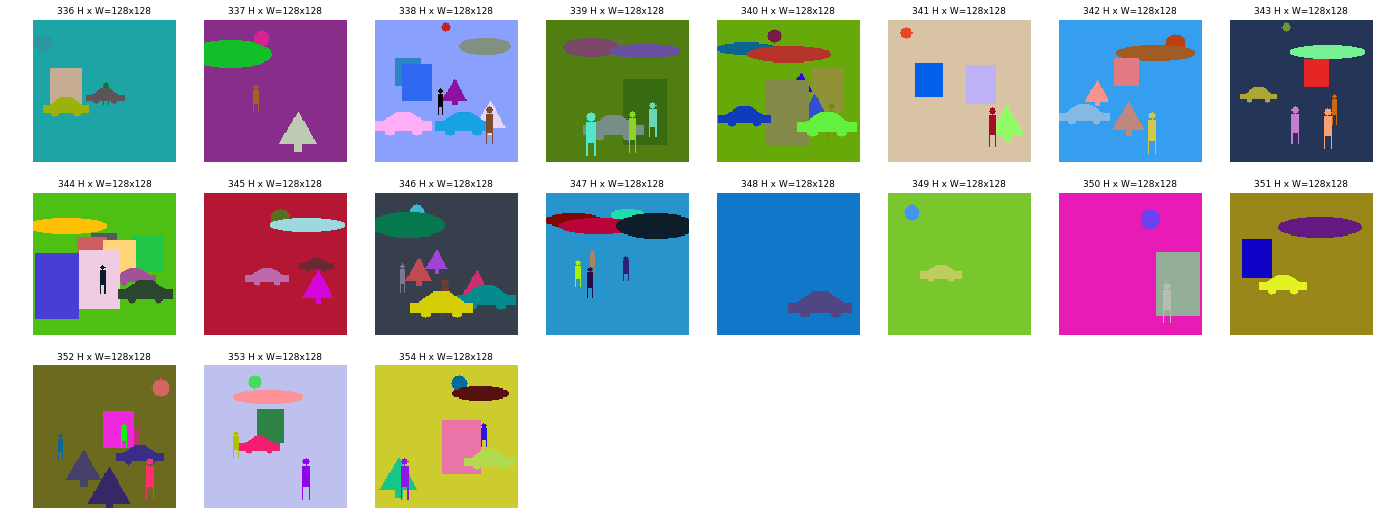

In [7]:
image_list = list(range(336,355))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

# Run MRCNN Detection pipeline on images

##  Run MRCNN detection pipeline on first image

### Load an image using `get_inference_batch()`

In [ ]:
test_batch = get_inference_batch(dataset_test,mrcnn_model.config, image_ids=[33], display=True)
# image = get_image_batch(dataset_test, 10, display=True)

In [ ]:
type(test_batch)
for i in test_batch:
    print(type(i))

In [ ]:
results = run_mrcnn_detection(mrcnn_model,dataset_test, image_ids=[33], verbose = 1)

###  Display Results

In [ ]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Display MRCNN scores - 1st style

In [ ]:
lmt =15
r = results[0]
print('       classes :', r['class_ids'][:lmt])
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in r['class_ids'][:lmt]])

print('               : ', names)
print('                ', r['detection_ind'][:lmt])
print('   orig scores :', r['scores'][:lmt])
print('    nomralized :', r['pr_scores'][:lmt,8])

print('-'*185)
print('   pr_scrs[11] :', r['pr_scores'][:lmt,11])
# print(' fcn_scores[8] :', r['fcn_scores'][:lmt,11])
print()
print(' pr_scores[14] :', r['pr_scores'][:lmt,14])
# print('fcn_scores[13] :', r['fcn_scores'][:lmt,14])
print()
print(' pr_scores[20] :', r['pr_scores'][:lmt,20])
# print('fcn_scores[19] :', r['fcn_scores'][:lmt,20])

####  Display MRCNN scores - 2nd style

In [ ]:
r = results[0]
for molded_bbox, cls, scr, pr_scr in zip(r['molded_rois'].astype(np.int), r['class_ids'],  r['scores'], r['pr_scores']):
    print('{} {:2d}  {:.<18s}  {:5.4f} {}  '.format(molded_bbox, cls, dataset_test.class_names[cls], scr, pr_scr[[4,5,6,7, 8]]))
    print('{:>86s} {}'.format(' mrcnn old style scores:  ',  pr_scr[[9,10,11]]))
#     print('{:>86s} {}'.format(' fcn old style scores:    ', fcn_scr[[9,10,11]]))
    print()
    print('{:>86s} {}'.format(' mrcnn alt scores1 : ',pr_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format(' mrcnn_scores2 : ',   pr_scr[[18,19,20,21,22,23]]))
    print()
#     print('{:>86s} {}'.format(' fcn alt scores1:  ',fcn_scr[[12,13,14,15,16,17]]))
#     print('{:>86s} {}'.format(' fcn_scores2:  '    ,fcn_scr[[18,19,20,21,22,23]]))
    print()

#### Display MRCNN scores - 3rd style

In [ ]:
for scr, pr_scr in zip(r['scores'], r['pr_scores']):
    print("scr: {:7.5f}   pr_scr: {:7.5f}  norm_scr: {:7.5f}   ALT Scr0: {:7.5f}  Alt1: {:7.5f}  Alt2: {:7.5f}".format(scr, pr_scr[5], pr_scr[8], pr_scr[11], pr_scr[14], pr_scr[20]))

In [ ]:
float_formatter = lambda x: "%9.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=195, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)
print('pr_scores')
print('---------')
for i in range(results[0]['pr_scores'].shape[0]):
    print(results[0]['pr_scores'][i,4:18])

### Display detections on Image

In [ ]:
from mrcnn.utils import log # Display results
ax = visualize.get_ax(rows =1, cols = 1, size= 8)
r = results[0]
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                            ax=ax, title="Predictions", score_range=(0.0, 1.7))

### Compute mAP and Display Precision/Recall Curve

In [ ]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 18

# Draw precision-recall curve
r = results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)
# same as above
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,orig_score])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,norm_score])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_0])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_1])
visualize.plot_precision_recall(AP, precisions, recalls)
 

##  Run MRCNN detection pipeline on second image

### Load an image using `get_inference_batch()`

In [ ]:
# from mrcnn.prep_notebook import get_image_batch, get_training_batch
# # images = get_image_batch(dataset_test, 4737, display = True)
image, _ = get_inference_batch(dataset_test,mrcnn_model, 4745, display=True)

In [ ]:
# from mrcnn.prep_notebook import run_fcn_detection
# fcn_results, fcn_gt_data = run_fcn_detection(fcn_model, mrcnn_model,dataset_test, image_id=1927, verbose = 1)
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_ids=4745, verbose = 0, display = True)

###  Display Results

In [ ]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Display MRCNN scores - 1st style

In [ ]:
lmt =15
r = results[0]
print('       classes :', r['class_ids'][:lmt])
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in r['class_ids'][:lmt]])

print('               : ', names)
print('                ', r['detection_ind'][:lmt])
print('   orig scores :',r['scores'][:lmt])
print('   norm scores :', r['pr_scores'][:lmt,8])
# print('  pr_scores[5] :', r['pr_scores'][:,5])

print('-'*185)
print('   pr_scrs[11] :', r['pr_scores'][:lmt,11])
# print(' fcn_scores[8] :', r['fcn_scores'][:lmt,11])
print()
print(' pr_scores[14] :', r['pr_scores'][:lmt,14])
# print('fcn_scores[13] :', r['fcn_scores'][:lmt,14])
print()
print(' pr_scores[20] :', r['pr_scores'][:lmt,20])
# print('fcn_scores[19] :', r['fcn_scores'][:lmt,20])

### Display detections on Image

In [ ]:
from mrcnn.utils import log # Display results
ax = visualize.get_ax(rows =1, cols = 1, size= 20)
r = results[0]
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                            ax=ax, title="Predictions", score_range=(0.0, 1.7))

### Compute mAP and Display Precision/Recall Curve

In [ ]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 18

# Draw precision-recall curve
r = results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['scores'])
visualize.plot_precision_recall(AP, precisions, recalls,ttl = "- Orig Score")
# same as above
# AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,orig_score])
# visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,norm_score])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Normlzd Score")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_0])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 0 ")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_1])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 1")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_2])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 1")
  

##  Run MRCNN detection pipeline on third image

### Load an image using `get_inference_batch()`

In [ ]:
# 13378, 33816
# image, _ = get_inference_batch(dataset_test, mrcnn_model, 13378, display=True)    

In [ ]:
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_id=13378, verbose = 0)
r = results[0]

### Display detections on Image

In [ ]:
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                             title="Predictions", score_range=(0.0, 0.7))


# Run FCN Detection pipeline on images

##  Run FCN detection pipeline on first image

### Load an image using `get_inference_batch()` or `image_id`

Loading 1 images
image                    shape: (128, 128, 3)         min:    4.00000  max:  252.00000


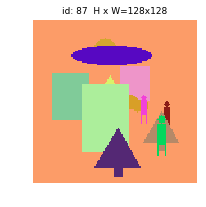

Image Id  : 87     External Id: shapes.87     Image Reference: 
[ ('sun', (213, 166, 48), (56, 24, 9, 9)),
  ('cloud', (87, 8, 194), (61, 28, 31, 7)),
  ('building', (238, 149, 201), (79, 50, 11, 13)),
  ('tree', (216, 242, 106), (60, 50, 9, 9)),
  ('building', (128, 203, 153), (29, 60, 14, 18)),
  ('car', (216, 159, 39), (73, 67, 16, 8)),
  ('person', (242, 65, 217), (86, 72, 2, 11)),
  ('building', (172, 238, 155), (56, 77, 18, 26)),
  ('person', (139, 28, 23), (104, 79, 2, 13)),
  ('tree', (181, 137, 104), (100, 84, 18, 18)),
  ('person', (4, 216, 93), (100, 94, 3, 16)),
  ('tree', (84, 40, 116), (66, 100, 22, 22))]
===>   fcn.detect_from_images() 
===>  mrcnn_model.detect()
Processing 1 images
image                    shape: (128, 128, 3)         min:    4.00000  max:  252.00000
molded_images            shape: (1, 128, 128, 3)      min: -119.70000  max:  128.30000
image_metas              shape: (1, 15)               min:    0.00000  max:  128.00000
===>  call mrcnn_model.predict()

In [46]:
# image, _ = get_inference_batch(dataset_test,mrcnn_model, 33, display=True)
IMG = 158
IMG = 310
IMG = 336
IMG =  87
image = get_image_batch(dataset_test, image_ids = [IMG],display=True)

fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_ids = [IMG], verbose = 1)

### Experimenation on softmax

In [11]:
fcn_sm = fcn_results[0]['fcn_sm']
fcn_hm = fcn_results[0]['fcn_hm']
print(fcn_sm.shape, fcn_hm.shape)

(128, 128, 7) (128, 128, 7)


#### compute softmax from fcn_hm and verify it gives the same output as fcn_sm returned from model

In [91]:
# hm = fcn_hm
# mx = np.max(hm[:,:,:], axis=-1, keepdims=True)
# ee = np.exp(hm[:,:,:] - mx)
# ss = np.sum(ee, axis = -1, keepdims = True)
# s1 = ee/ss
# print('MX    : ',mx.shape)    
# print(mx[:10,:10,0])
# print('EE    : ',ee.shape)
# print('SS    : ',ss.shape)
# print('EE/SS : ',s1.shape)
# # smax = np.dstack((np.zeros_like(hm[:,:,:1]), (ee/ss)))
# smax = s1
# print('SMAX  : ',smax.shape)
# print(smax[:10,:10,0])
# print(smax[:10,:10,1])
# cls_max = np.argmax(smax, axis = -1)
# print('CLS_MAX : ',cls_max.shape)
# print(utils.mask_string(cls_max))

#### fcn_sm directly from FCN model

In [10]:
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =100000)
dataset_test.display_active_class_info()
sm =  fcn_results[0]['fcn_sm']
cls_max2 = np.argmax(sm, axis = -1)
print('CLS_MAX2 : ',cls_max2.shape)
print(utils.mask_string(cls_max2))

[1, 2, 3, 4, 5, 6]
internal_class:  1 ext_cls: 1 name: None - person
internal_class:  2 ext_cls: 2 name: None - car
internal_class:  3 ext_cls: 3 name: None - sun
internal_class:  4 ext_cls: 4 name: None - building
internal_class:  5 ext_cls: 5 name: None - tree
internal_class:  6 ext_cls: 6 name: None - cloud
CLS_MAX2 :  (128, 128)
[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [000

In [97]:
# for cls in range(7):
#     print('CLASS :', cls , '-----------------')
#     for i in range(10):
#         print(fcn_sm[i,:10,cls])
#     print('hm')
#     for i in range(10):
#         print(fcn_hm[i,:10,cls])
#     print()

## Display FCN detections on Image

Detected classes: [3 4 5]
Image Meta     :  [357 128 128   3   0   0 128 128   1   1]
Orig Image Meta:  [357 128 128   3   0   0 128 128   1   1]


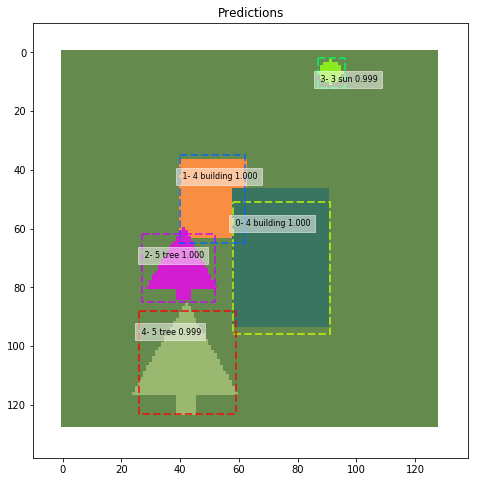

In [42]:
f = fcn_results[0]
print('Detected classes:', np.unique(f['class_ids']))
print('Image Meta     : ', f['image_meta'][:10])
print('Orig Image Meta: ', f['orig_image_meta'][:10])
visualize.display_instances(f['image'], f['rois'],  f['class_ids'], dataset_test.class_names, f['scores'], title="Predictions", score_range=(0.0, 1.7))

####  Display scores on image

GT classes:  [1 6]
Detected classes: [1 6]
Image Meta:  [ 22 128 128   3   0   0 128 128   1   1]
 Image_id    :  33  Reference:  [('sun', (156, 23, 99), (57, 7, 4, 4)), ('cloud', (122, 49, 197), (84, 26, 27, 9)), ('building', (206, 6, 196), (44, 52, 12, 14)), ('building', (210, 107, 199), (52, 68, 16, 22)), ('tree', (163, 207, 66), (22, 68, 14, 14)), ('car', (186, 144, 59), (96, 73, 18, 9)), ('person', (92, 247, 18), (33, 78, 2, 13)), ('car', (138, 96, 8), (63, 83, 21, 10)), ('person', (237, 251, 107), (37, 98, 3, 17)), ('person', (113, 4, 196), (50, 104, 3, 19))] Coco Id: 33
 Image meta  :  [ 33 128 128   3   0   0 128 128   1   1]
 Class ids   :  (10,)    [3 6 4 4 5 2 1 2 1 1]
 Class Names :  ['sun', 'cloud', 'building', 'building', 'tree', 'car', 'person', 'car', 'person', 'person']


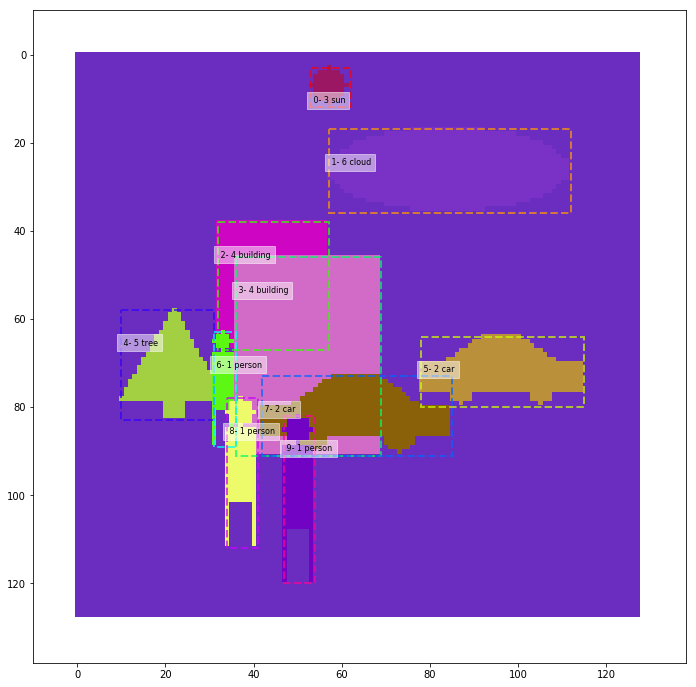

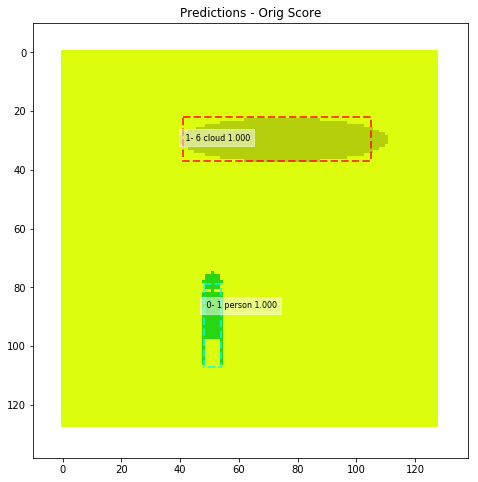

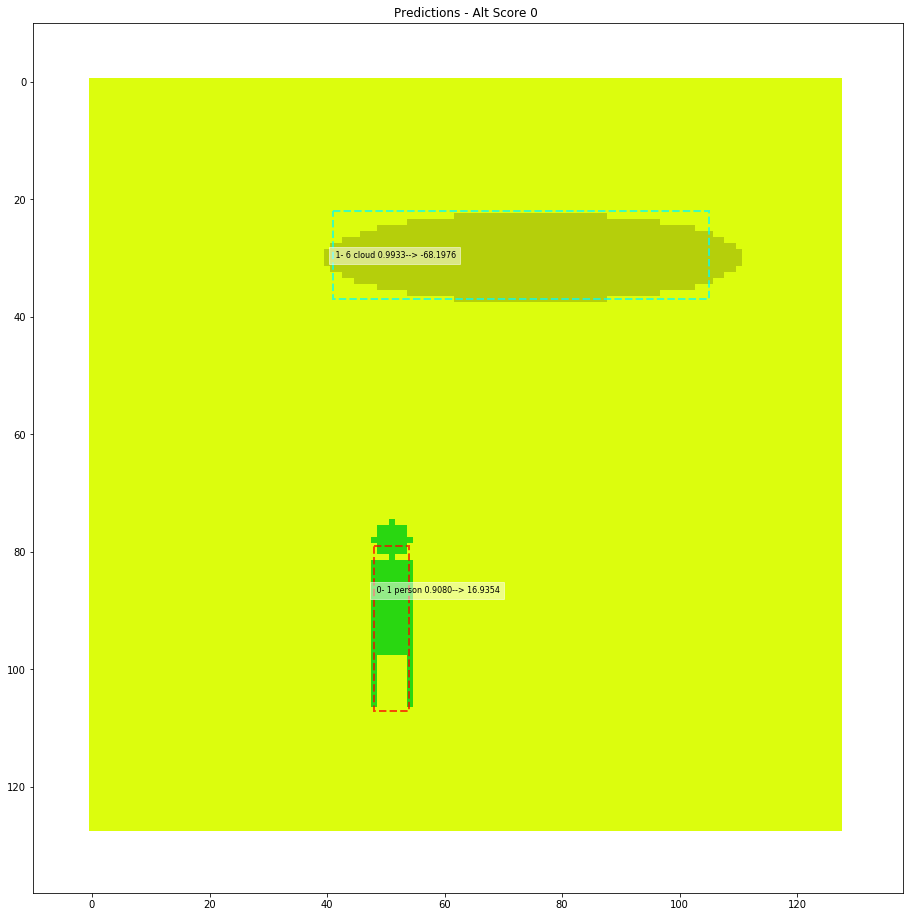

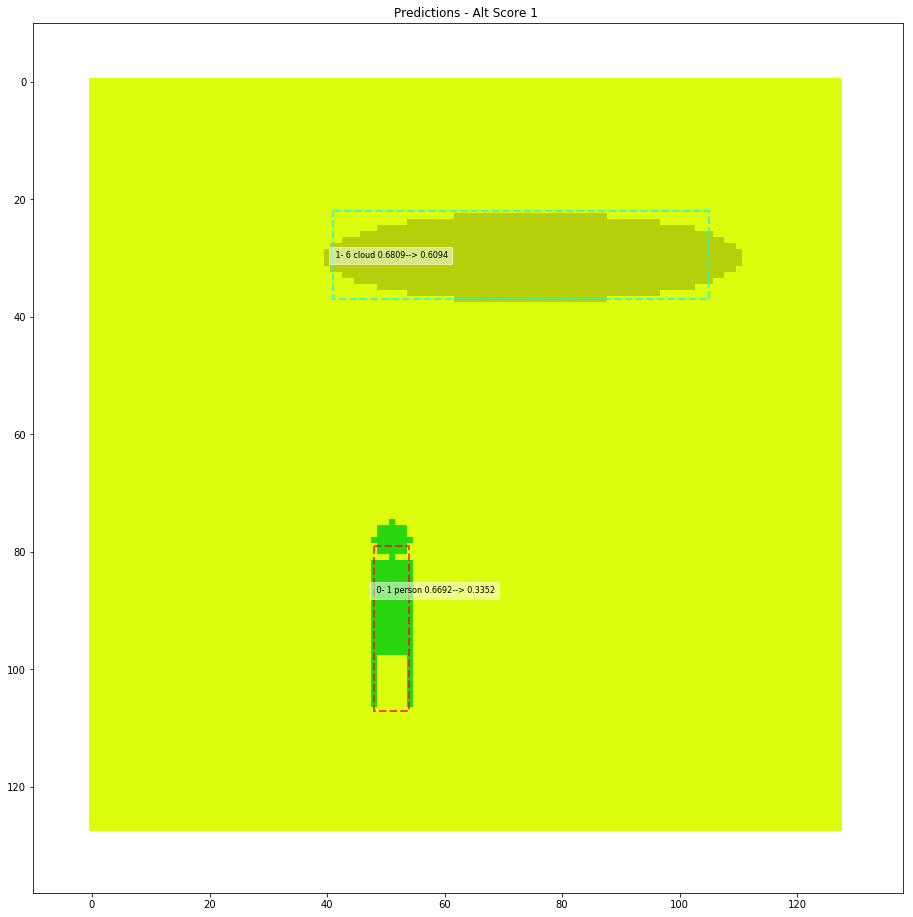

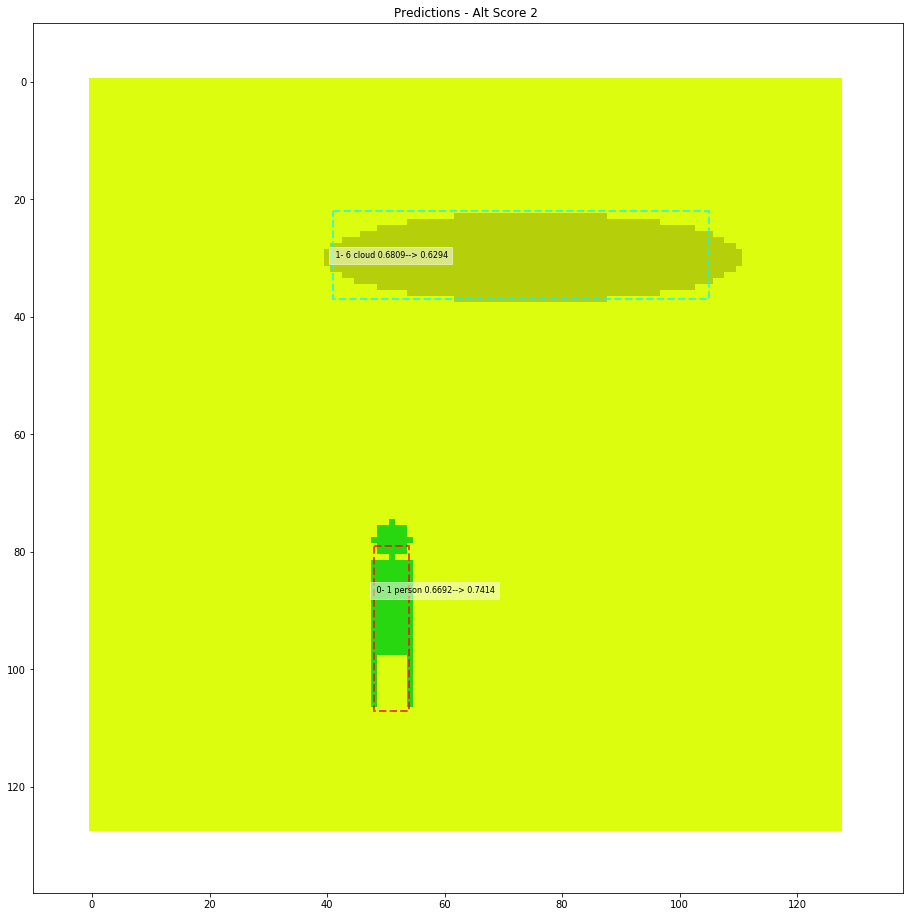

In [114]:
#### Display detections
## old_score   : 11
## alt_score_1 : 14
## alt_score_2 : 20
f = fcn_results[0]
# print('class ids: ', np.unique(f['pr_scores'][:,4]).astype(int).tolist())
det_classes = np.unique(f['class_ids'])
print('GT classes: ', np.unique(f['gt_class_ids']))
print('Detected classes:', det_classes)
print('Image Meta: ', f['orig_image_meta'][:10])
clses = None
visualize.display_image_gt(dataset_test, mrcnn_model.config, 33)
# visualize.display_instances_from_prscores(f['image'], f['pr_scores'], class_names, score_range=(-999, 9999), only_classes = [1])
# visualize.display_instances(f['image'], f['rois'],  f['class_ids'], class_names, f['scores'], title="Predictions", score_range=(0.7, 0.99), size = 24)
visualize.display_instances(f['image'], f['rois'], f['class_ids'], class_names, f['scores'], title="Predictions - Orig Score", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,11], f['fcn_scores'][:,11],title="Predictions - Alt Score 0 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,14], f['fcn_scores'][:,14],title="Predictions - Alt Score 1 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,20], f['fcn_scores'][:,20],title="Predictions - Alt Score 2 ", only_classes=clses)
## display normalized scores 
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:, 8], f['fcn_scores'][:, 8],title="Predictions - Orig Score  (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,17], f['fcn_scores'][:,17],title="Predictions - Alt Score 1 (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,23], f['fcn_scores'][:,23],title="Predictions - Alt Score 2 (Normalized by class)", only_classes=clses)


## Display Results

In [47]:
f = fcn_results[0]
for i,j in zip(f['gt_class_ids'], f['gt_bboxes']):
    print(i, ' ', j )
ovl = utils.compute_overlaps(f['gt_bboxes'], f['gt_bboxes'])
print()
for i,j in zip(f['gt_class_ids'], ovl):
    print('{:2d}  - {:15s}  {}' .format(i,dataset_test.class_names[i],j))
 

3   [15 48 22 65]
6   [21 30 36 93]
4   [37 68 64 91]
5   [44 56 51 64]
4   [42 15 79 44]
2   [59 75 73 90]
1   [59 84 82 89]
4   [ 51  38 104  75]
1   [ 64 102  83 107]
5   [ 72  86 103 114]
1   [ 75  97 107 104]
5   [ 85  48 123  84]

 3  - sun              [1.0000 0.0162 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 6  - cloud            [0.0162 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 4  - building         [0.0000 0.0000 1.0000 0.0000 0.0000 0.0992 0.0352 0.0365 0.0000 0.0000 0.0000 0.0000]
 5  - tree             [0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 4  - building         [0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0586 0.0000 0.0000 0.0000 0.0000]
 2  - car              [0.0000 0.0000 0.0992 0.0000 0.0000 1.0000 0.2745 0.0000 0.0000 0.0037 0.0000 0.0000]
 1  - person           [0.0000 0.0000 0.0352 0.0000 0.0000 0.2745 1.0000 0.0000 0.0000 0.0315 0.0000 0.0000]


In [45]:

# print(utils.compute_one_iou([58, 28, 78, 44],[ 37, 76, 68, 99]  ))
# print(utils.compute_one_iou([58, 28, 78, 44],[ 49,  41, 108,  82] ))
# print(utils.compute_one_iou([58, 28, 78, 44],[47, 32, 76, 66])) 
# 56  63  77  68
# Image 87 iou between SUN Gt and detected boxes
# print(utils.compute_one_iou([15,  48,  22,  65 ] , [14,  52,  19,  63 ]))
# Image 386 iou between person GT and detected boxes
# print(utils.compute_one_iou([56, 63 ,77 ,68] ,[71,  9, 86, 48]))
# print(utils.compute_one_iou([56, 63 ,77 ,68] ,[63, 51, 77, 80]))
# IMage 344 - Very short building in top of image
# print(utils.compute_one_iou([37,  52,  43,  75] ,[40,  39,  55,  66]))
# print(utils.compute_one_iou([37,  52,  43,  75] ,[39,  89,  72, 116]))
# print(utils.compute_one_iou([37,  52,  43,  75] ,[43,  63,  73,  92]))

 Intersection: 42   Union: 501   IoU: 0.08383233532934131 
0.08383233532934131
 Intersection: 0   Union: 1029   IoU: 0.0 
0.0
 Intersection: 0   Union: 1008   IoU: 0.0 
0.0


#### display mrcnn scores 

Image id: 87
GT_BOXES for image  87
--------------------------------------------------
                          |                         
        class             |                         
seq  id name              |  Y1  X1  Y2  X2   CX  CY
--------------------------------------------------
  0  3 sun                  15  48  22  65  56.5   18.5
  1  6 cloud                21  30  36  93  61.5   28.5
  2  4 building             37  68  64  91  79.5   50.5
  3  5 tree                 44  56  51  64  60.0   47.5
  4  4 building             42  15  79  44  29.5   60.5
  5  2 car                  59  75  73  90  82.5   66.0
  6  1 person               59  84  82  89  86.5   70.5
  7  4 building             51  38 104  75  56.5   77.5
  8  1 person               64 102  83 107 104.5   73.5
  9  5 tree                 72  86 103 114 100.0   87.5
 10  1 person               75  97 107 104 100.5   91.0
 11  5 tree                 85  48 123  84  66.0  104.0

PR_SCORES from fcn/mrcnn_resul


 53   1 person          ( 61.00, 80.00)  ( 83.00, 84.00) |  82.00/ 72.00     4.00~  22.00    88.00   21.00 |   1.41   3.32 |  81  83  69  75  12 |  81  83  68  76  16
              0.6512
                     cls:   1-person      cx/cy:   -0.018   cx/cy+-1:   -0.077   cx/cy+-3:   -0.324  fr/to:    0.523   fr/to+1:    1.001    fr-1/to+1:    1.434   full:    0.205
                     cls:   2-car         cx/cy:    0.021   cx/cy+-1:    0.047   cx/cy+-3:    0.239  fr/to:    0.916   fr/to+1:    1.596    fr-1/to+1:    2.381   full:    1.642
                     cls:   3-sun         cx/cy:   -0.098   cx/cy+-1:   -0.363   cx/cy+-3:   -2.781  fr/to:   -0.596   fr/to+1:   -1.032    fr-1/to+1:   -1.656   full:   -5.750
                     cls:   4-building    cx/cy:    0.003   cx/cy+-1:    0.017   cx/cy+-3:    0.059  fr/to:    0.428   fr/to+1:    0.695    fr-1/to+1:    0.993   full:    1.418
                     cls:   5-tree        cx/cy:   -0.009   cx/cy+-1:    0.000   cx/cy+-3:    0.145  fr

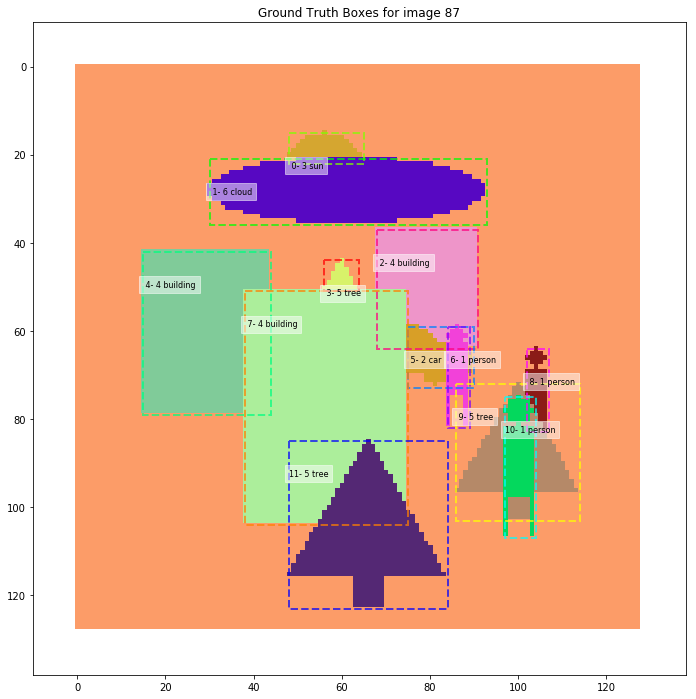

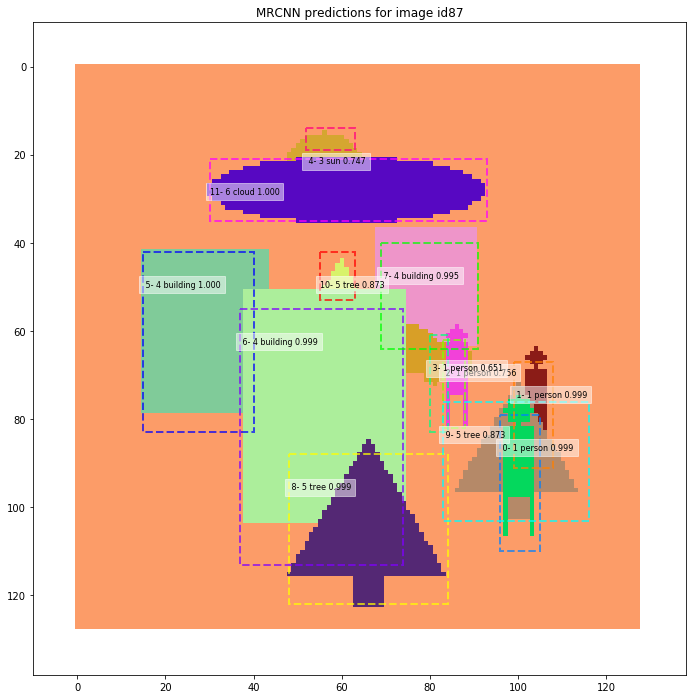

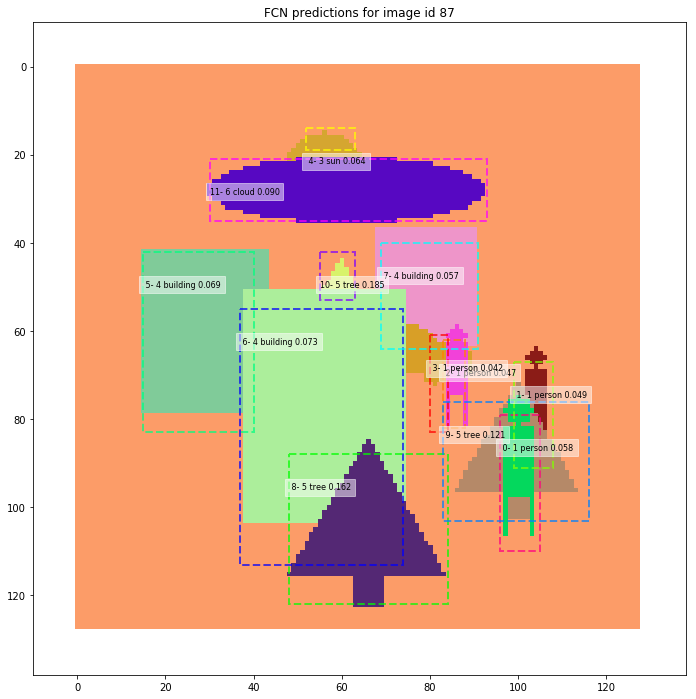

In [48]:
print('Image id:', IMG)
f = fcn_results[0]
cls = None

vis2.display_gt_bboxes(dataset_test, mrcnn_model.config, image_id = IMG, only = cls)
vis2.display_pr_scores(f, class_names, only = cls)
vis2.display_fcn_scores(f, class_names, only = cls)
vis2.display_fcn_scores_box_info(f['fcn_scores'], f['fcn_hm'], class_names, only = cls)


#### Display MRCNN and FCN scores - 1st style

In [149]:
#### detections as returned from the model's `detect()` functon

lmt =18
f = fcn_results[0]
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in f['pr_scores'][:lmt, 4].astype(np.int32)])


# print('  f[class_ids] class :', f['class_ids'][:lmt])
print('   f[pr_score] class :', f['pr_scores'][:lmt,4].astype(np.int))
print('                       ', names)
print('           TP/FP Ind :', f['pr_scores'][:lmt,6].astype(np.int))
print('          orig score :', f['pr_scores'][:lmt,5])
print('      cls norm score :', f['pr_scores'][:lmt,8])
print('           bbox area :', f['pr_scores'][:lmt,10])
print('           clip area :', f['pr_scores'][:lmt,13])
print()
print('-'*185)
print('     pr_score_0 [11] :', f['pr_scores'][:lmt,11])
print('    fcn_score_0 [11] :', f['fcn_scores'][:lmt,11])
print()
print('     pr_score_1 [14] :', f['pr_scores'][:lmt,14])
print('    fcn_score_1 [14] :', f['fcn_scores'][:lmt,14])
print()
print('     pr_score_2 [20] :', f['pr_scores'][:lmt,20])
print('    fcn_score_2 [20] :', f['fcn_scores'][:lmt,20])
print()
print('norm pr_score_1 [17] :', f['pr_scores'][:lmt,17])
print('norm fcn_score  [17] :', f['fcn_scores'][:lmt,17])
print()
print('norm pr_score_2 [23] :', f['pr_scores'][:lmt,23])
print('norm fcn_score  [23] :', f['fcn_scores'][:lmt,23])


   f[pr_score] class : [         1          1          1          2          3          4          4          4          4          5          6          6          6]
                            person     person     person        car        sun   building   building   building   building       tree      cloud      cloud      cloud
           TP/FP Ind : [         1          1          1          1          1          1          1          1          1          1          1          1          1]
          orig score : [    0.9994     0.9962     0.8363     1.0000     0.9988     0.9997     0.9991     0.9989     0.5113     0.9995     0.9998     0.9923     0.9844]
      cls norm score : [    1.0000     0.9968     0.8368     1.0000     1.0000     1.0000     0.9994     0.9992     0.5114     1.0000     1.0000     0.9925     0.9846]
           bbox area : [  240.0000   102.0000   140.0000   900.0000   552.0000  1386.0000   702.0000  1456.0000  1400.0000   928.0000  1088.0000   280.0000   420

#### Display MRCNN  and FCN scores - 2nd style

In [178]:
f = fcn_results[0]
for pr_scr, fcn_scr in zip(f['pr_scores'], f['fcn_scores']):
    int_cls = pr_scr[4].astype(np.int)
    print('{:2d}  {:.<18s}  {}  '.format(int_cls, class_names[int_cls], fcn_scr[:9]))
    print('{:>40s} {}'.format(' Bbox Coordinates: ', pr_scr[:4]))
    print('{:>40s} {}'.format('Orig / Norm score: ',  pr_scr[[5,8]]))
    print('{:>40s} {}'.format(' mrcnn score 0:  ',  pr_scr[[9,10,11]]))
    print('{:>40s} {}'.format('   fcn score 0:  ', fcn_scr[[9,10,11]]))
    print()
    print('{:>40s} {}'.format(' mrcnn score 1:  ', pr_scr[[12,13,14,15,16,17]]))
    print('{:>40s} {}'.format(' mrcnn_score 2:  ', pr_scr[[18,19,20,21,22,23]]))
    print()
    print('{:>40s} {}'.format('  fcn scores 1:  ', fcn_scr[[12,13,14,15,16,17]]))
    print('{:>40s} {}'.format('  fcn scores 2:  ', fcn_scr[[18,19,20,21,22,23]]))
    print()

 1  person............  [   79.0000    96.0000   110.0000   105.0000     1.0000     0.9993     1.0000    61.0000     1.0000]  
                      Bbox Coordinates:  [   79.0000    96.0000   110.0000   105.0000]
                     Orig / Norm score:  [    0.9993     1.0000]
                        mrcnn score 0:   [    0.9627   279.0000     0.9627]
                          fcn score 0:   [    6.8968   279.0000     6.8968]

                        mrcnn score 1:   [   27.6797    40.0000     0.6920     1.0000     1.0000     1.0000]
                        mrcnn_score 2:   [   27.6797    40.0000     0.6920     1.0000     1.0000     1.0000]

                         fcn scores 1:   [    2.3121    40.0000     0.0578     1.0000     1.0000     1.0000]
                         fcn scores 2:   [   19.4729    40.0000     0.4868     1.0000     1.0000     1.0000]

 1  person............  [   67.0000    99.0000    91.0000   108.0000     1.0000     0.9986     1.0000    59.0000     0.9993]  
   

####  Display MRCNN  and FCN scores - 3rd style

In [147]:
# r = results[0]
print(f['detections'].shape)
print('   old_scores: (gauss. sum over large bbox/bbox area/ gauss_sum * normlzd_score))')
print('  alt_scores 1: (gauss. sum over small mask/mask area/ gauss_sum / mask_area):  ')
sort_by_class_order = np.argsort(f['class_ids'])


# for i in range(len( f['class_ids'])):
for i in sort_by_class_order:
#     print(i , f['rois'][i].astype(np.float), f['scores'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
#     print(i , f['detections'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
    det_type = '       --> ADDED FP ' if f['pr_scores'][i,6] == -1 else '      Original detection'
    print(i , f['pr_scores'][i,:9], f['pr_scores'][i,4], class_names[ f['pr_scores'][i,4].astype(np.int)], det_type) 
    print()
    print(i , 'pr: old_scores [9,10,11]:  '.rjust(90), f['pr_scores'][i,9:12])    
    print(i , '  alt_scores 1 [12 - 17]:  '.rjust(90), f['pr_scores'][i,12:18])    
    print(i , '  alt_scores 2 [18 - 23]:  '.rjust(90), f['pr_scores'][i,18:23])    
    print(i)
#     print(i , f['fcn_scores'][i,:8], f['fcn_scores'][i,4], class_names[ f['fcn_scores'][i,4].astype(np.int)])    
    print(i , 'fcn: old_scores [9,10,11]:  '.rjust(90), f['fcn_scores'][i,9:12])    
    print(i ,  '  alt_scores 1 [12 - 17]:  '.rjust(90), f['fcn_scores'][i,12:18])    
    print(i ,  '  alt_scores 2 [18 - 23]:  '.rjust(90), f['fcn_scores'][i,18:23])    
    print()
    print(i , '  old score [11]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,11] ,f['fcn_scores'][i,11]))
    print(i , 'alt score 1 [14]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,14],f['fcn_scores'][i,14]))
    print(i , 'alt score 2 [20]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,20],f['fcn_scores'][i,20]))
    print()

(64, 7)
   old_scores: (gauss. sum over large bbox/bbox area/ gauss_sum * normlzd_score))
  alt_scores 1: (gauss. sum over small mask/mask area/ gauss_sum / mask_area):  
4 [   14.0000     8.0000    37.0000    32.0000     3.0000     0.9988     1.0000    57.0000     1.0000] 3.0 sun       Original detection

4                                                                pr: old_scores [9,10,11]:   [    0.9987   552.0000     0.9987]
4                                                                  alt_scores 1 [12 - 17]:   [   34.6845    49.0000     0.7078     1.0000     1.0000     1.0000]
4                                                                  alt_scores 2 [18 - 23]:   [   34.6845    49.0000     0.7078     1.0000     1.0000]
4
4                                                               fcn: old_scores [9,10,11]:   [   -0.2387   552.0000    -0.2387]
4                                                                  alt_scores 1 [12 - 17]:   [    1.9076    49.0000     0.0

In [ ]:
f = fcn_results[0]
# print(r['image_meta'])
print(f['gt_bboxes'])

In [12]:
np_format = {}
float_formatter = lambda x: "%9.4f" % x
int_formatter   = lambda x: "%9d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=210, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [105]:
# f = fcn_results[0]
# print(f['pr_scores'][:,4], f['pr_scores'][:,5])
# print(f['fcn_scores'][:,4], f['fcn_scores'][:,5])
# print(f['class_ids'], f['scores'])
# print(f['pr_scores'][:,4:])

# print(f['molded_rois'])
# print(f['pr_hm_scores'].shape)
# print(f['pr_hm_scores'][:,:3,:4])
# print(f['pr_scores_by_class'].shape)
# print(f['pr_scores_by_class'][:,:3,:4])
# print()
# print(f['detections'][:20])
# print(f['scores'])
# print(f['class_ids'])
# print(f['pr_scores'][:,:7])
# print(f['gt_bboxes'])
# print(f['gt_class_ids'])

### Compute mAP and Display Precision/Recall Curve

In [ ]:
# Draw precision-recall curve
f= fcn_results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)

#  Compute AP routine

In [ ]:
from mrcnn.utils import trim_zeros, compute_overlaps
def compute_ap(gt_boxes, gt_class_ids,
               pred_boxes, pred_class_ids, pred_scores,
               iou_threshold=0.5):
    '''
    Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP:            Mean Average Precision
    precisions:     List of precisions at different class score thresholds.
    recalls:        List of recall values at different class score thresholds.
    overlaps:       [pred_boxes, gt_boxes] IoU overlaps.
    '''
    # Trim zero padding and sort predictions by score from high to low
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes   = trim_zeros(gt_boxes)
    pred_boxes = trim_zeros(pred_boxes)
    pred_scores= pred_scores[:pred_boxes.shape[0]]
    indices    = np.argsort(pred_scores)[::-1]   ## sort indices from largest to smallest
    print('arg_sort indicies:', indices)
    pred_boxes     = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores    = pred_scores[indices]
    
    print(' Total predicitons: ')
    print(len(pred_class_ids), len(pred_boxes), len(pred_scores))
    # Compute IoU overlaps [pred_boxes, gt_boxes]
    overlaps = compute_overlaps(pred_boxes, gt_boxes)
    print('ovelatps: ',overlaps.shape)
    print(overlaps)
    
    # Loop through ground truth boxes and find matching predictions
    match_count = 0
    pred_match = np.zeros([pred_boxes.shape[0]])
    gt_match   = np.zeros([gt_boxes.shape[0]])
    
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] == 1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            if iou < iou_threshold:
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count  += 1
                gt_match[j]   = 1
                pred_match[i] = 1
                break
    print(' after overlap computation')
    print('pred_match :', pred_match)
    print('  gt_match :', gt_match)
    # Compute precision and recall at each prediction box step
    precisions = np.cumsum(pred_match) / (np.arange(len(pred_match)) + 1)
    recalls    = np.cumsum(pred_match).astype(np.float32) / len(gt_match)
    
    print(' precisions')
    print(np.cumsum(pred_match), '/', (np.arange(len(pred_match)) + 1))
    print(precisions)
    print()
    print(' recalls ')
    print(np.cumsum(pred_match), '/', len(gt_match))
    print(recalls)
    print()
    
    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls    = np.concatenate([[0], recalls, [1]])
    print('appended [0/0], [0/1] to front/end of precisions/recalls')
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    
    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])
    print('backtracking precsiosn values:', list(range(len(precisions) - 2, -1, -1)))
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    # Compute mean AP over recall range
    print(' Rc[:-1] : ', recalls[:-1])
    print(' Rc[1:]  : ', recalls[1:])
    print(' Pr[1:]  : ', precisions[1:])
    print()

    ## find points where recall values changes 
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP     = np.sum((recalls[indices] - recalls[indices - 1]) * precisions[indices])
    
    print('where recalls[:-1] != recalls[1:]:', np.where(recalls[:-1] != recalls[1:]))
    print('indices at recall changes : ', indices)
    print(' A1: recall[indices]  : ', recalls[indices])
    print(' A2: recall[indices-1]: ', recalls[indices-1])
    print(' A1 - A2              : ', (recalls[indices] - recalls[indices - 1]))
    print(' P1:precision[indices]: ', precisions[indices])
    print(' (A1-A2)*P1           : ', (recalls[indices] - recalls[indices - 1]) * precisions[indices])
    print(' Sum = mAP            : ', mAP)
    print(' Pr        : ', precisions)
    print(' Rc        : ', recalls)
    print(' Pr*Rc     : ', precisions*recalls)
    print(' Sum(Pr*Rc): ', np.sum(precisions*recalls))
    print(' Sum(Pr*Rc)/m: ', np.sum(precisions*recalls)/len(precisions))
    return mAP, precisions, recalls, overlaps

In [ ]:
AP, precisions, recalls, overlaps = compute_ap(f['gt_bbox'], f['gt_class_id'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)

In [ ]:
f = fcn_results[0]
clses = [61]
# print('class ids: ', np.unique(f['pr_scores'][:,4]).astype(int).tolist())

print('Detected classes:', f['gt_class_id'])
print(f['gt_bbox'])
print('Image Meta: ', f['orig_image_meta'][:10])
visualize.display_image_gt(dataset_test, mrcnn_model.config, 44236, only_classes=clses)

In [ ]:
len(precisions)
precisions


# Display Heatmaps

In [115]:
from mrcnn.visualize import (plot_one_bbox_heatmap, 
                             plot_3d_heatmap, plot_2d_heatmap, 
                             plot_2d_heatmap_compare, plot_3d_heatmap_compare)
image_id=f['orig_image_meta'][0]
print('Image id: ',image_id, ' Coco ID: ', dataset_test.image_info[image_id]['id'])
print(f['pr_scores'][:,4])
coco_class_names = dataset_test.class_names
pr_class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
fcn_class_ids = np.unique(f['fcn_scores'][:,4]).astype(int).tolist()
print('Pred class ids: ', pr_class_ids)
print('FCN  class ids: ', fcn_class_ids)

Image id:  22  Coco ID:  22
[1.0000 6.0000]
Pred class ids:  [1, 6]
FCN  class ids:  [1, 6]


## Overlay Images with Heatmaps

### Overlay image with pred_heatmaps

class ids:  [1, 6]
 Scaling options are:  'all', 'class'/'each' , or  'clip' 
 heatmap shape:  (128, 128, 7)  Bounding boxes shape:  (7, 64, 24)
Display classes: [1, 6]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


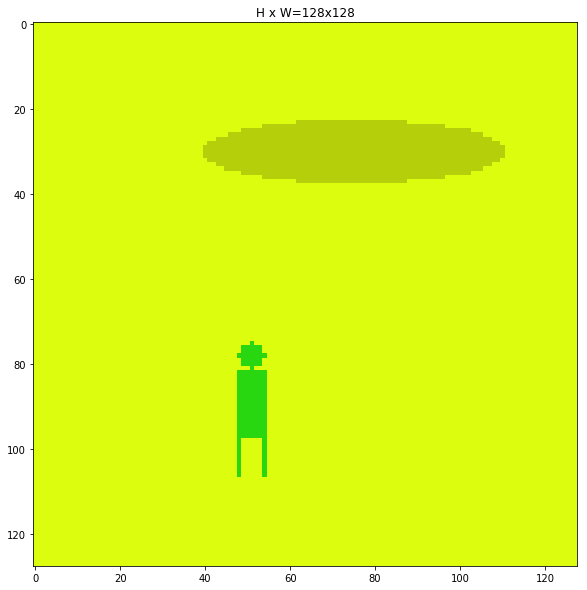

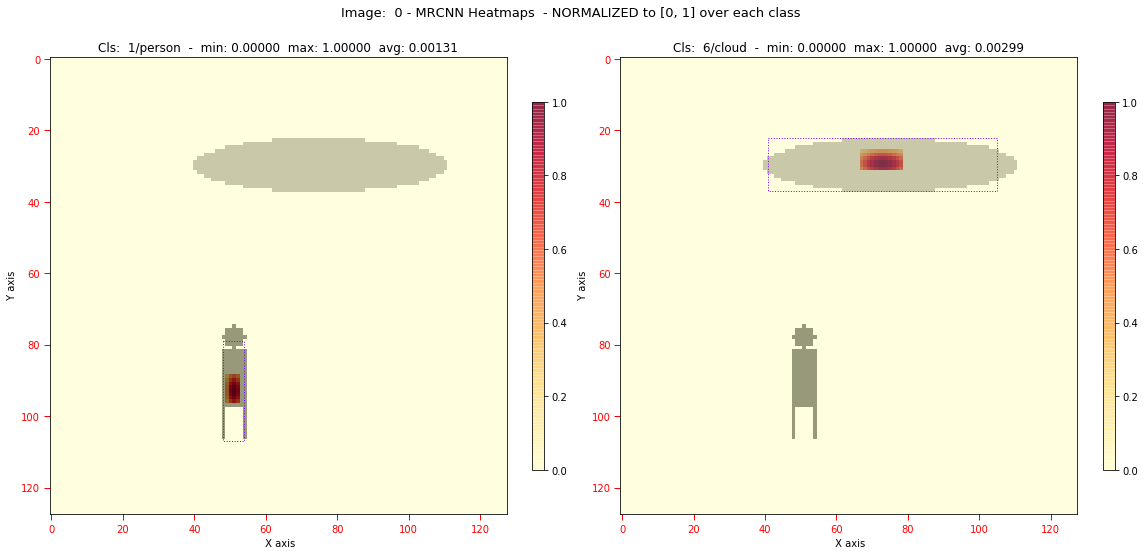

In [116]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'pr_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
#                      config = mrcnn_config, class_ids = class_ids)

### Overlay image with fcn_heatmaps

class ids:  [1, 6]
 Scaling options are:  'all', 'class'/'each' , or  'clip' 
 heatmap shape:  (128, 128, 7)  Bounding boxes shape:  (7, 64, 24)
Display classes: [1, 6]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


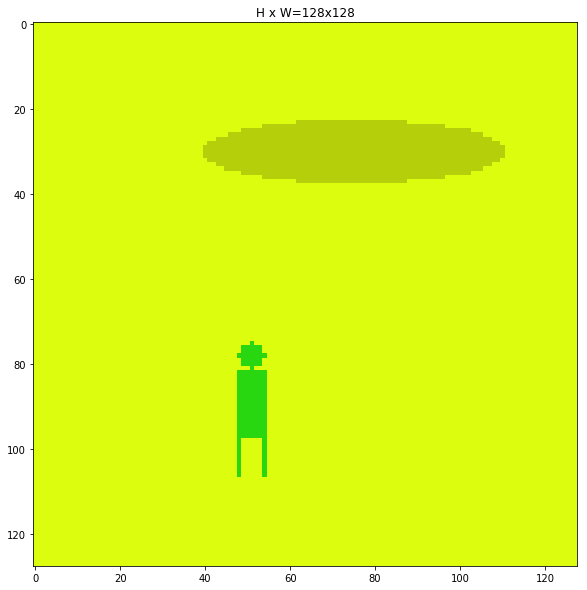

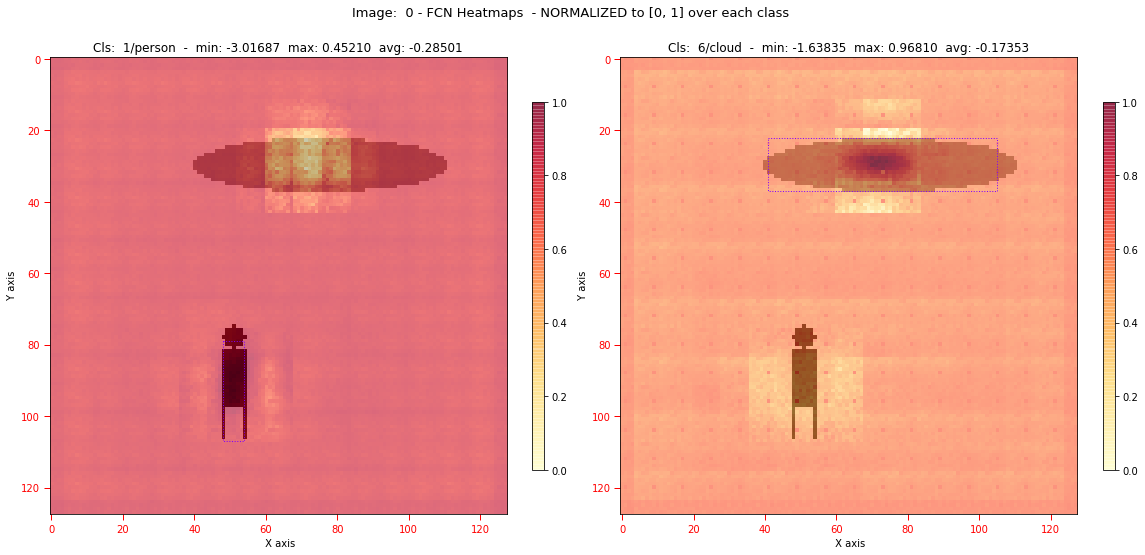

In [117]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'fcn_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  

### Overlay image with pr_heatmaps and fcn_heatmaps

 Scaling options are: 'all', 'class', 'each' , or  'clip' : 
 heatmap shape:  (128, 128, 7)
 Bounding boxes shape:  (7, 64, 24)
Image shape : (128, 128, 3)  class_ids: [1 6]


D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Program Files\Anaconda3\envs\TF\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


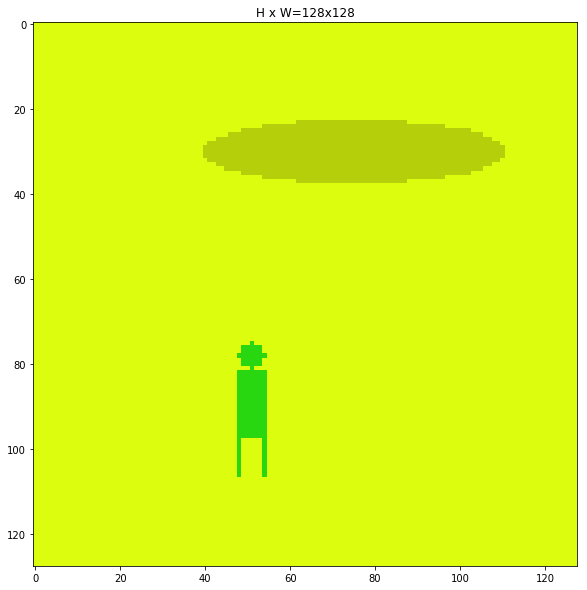

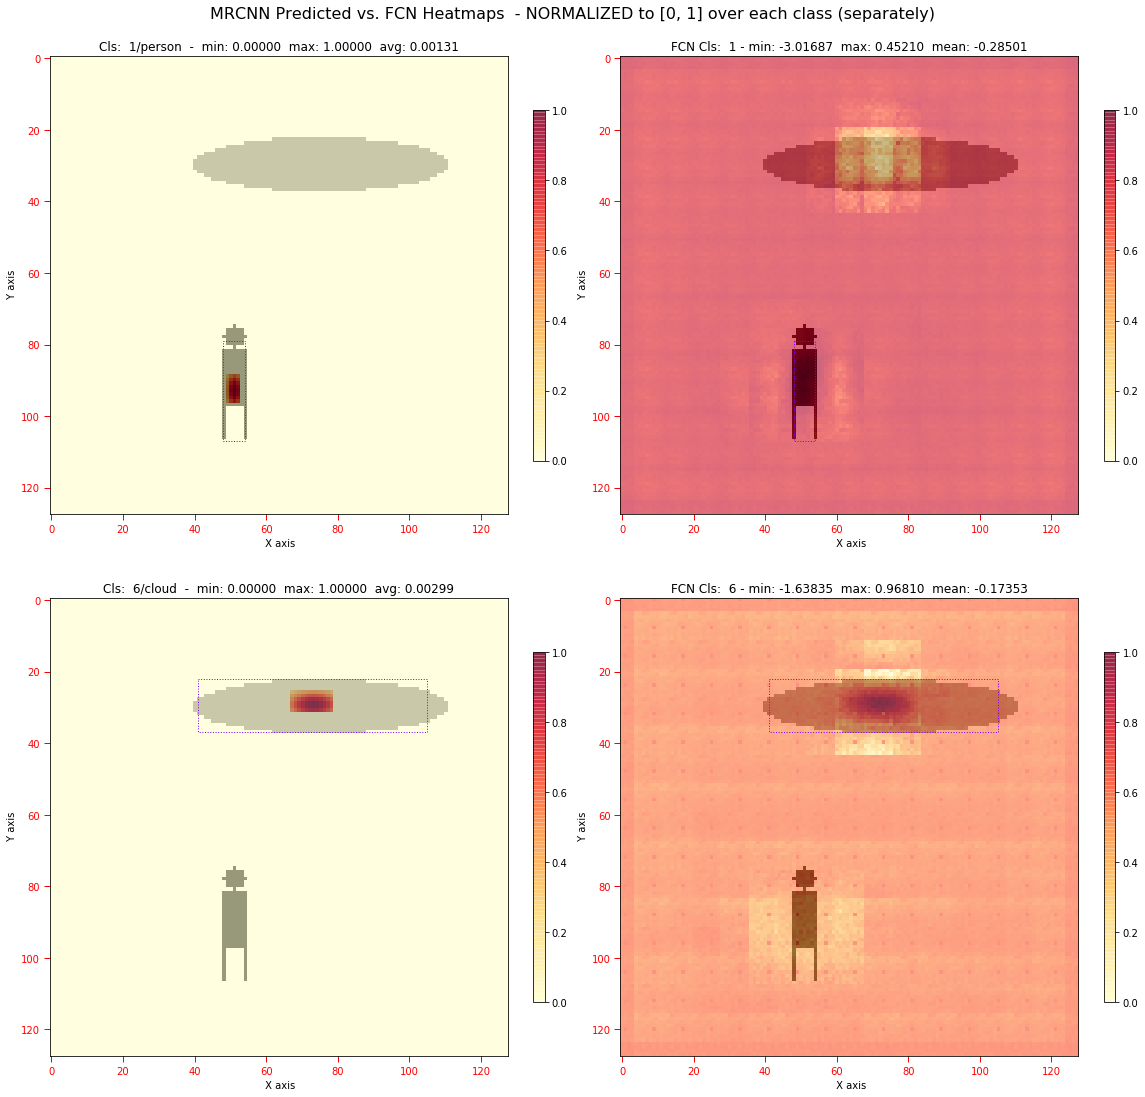

In [118]:
visualize.inference_heatmaps_compare(fcn_results, image_id = 0 , hm = 'fcn_hm', 
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names, scaling = 'each')

##  3D Plots

####  3D plot of `fcn_heatmap` returned form model - classes predicted by MRCNN only 

0.9680987 -3.057863
(128, 128, 7)
Image : 0  ClassIds: [1, 6]
 Scaling options are 'all', 'class', or 'clip'/ None 
Display classes: [1, 6]
rows   1  columns : 2
3
 min_z_all shape: ()  min_z_all: -3.057863  max_z_all: () max_z_all: 0.9680987
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 
1 zlim = each  zlim_min : -3.01687074 zlim_max: 0.45210063 
1 zlim = each  zlim_min : -1.63835227 zlim_max: 0.96809870 


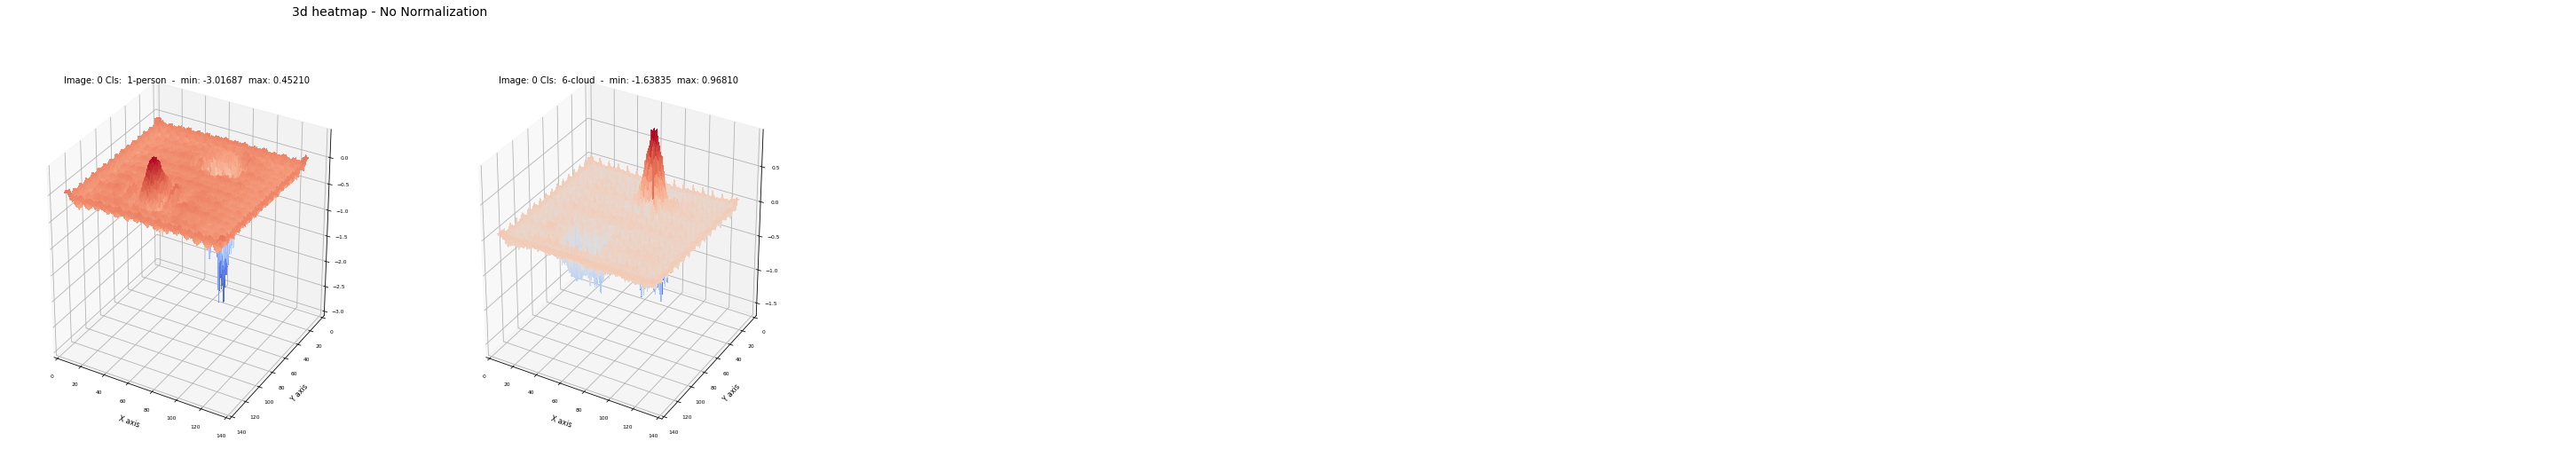

In [119]:
print(np.max(f['fcn_hm']), np.min(f['fcn_hm']))
print(f['fcn_hm'].shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
plot_3d_heatmap(f['fcn_hm'], 0, class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_softmax` returned form model - only classes in pred_scores

(128, 128, 7)
Image : 0  ClassIds: [1, 6]
 Scaling options are 'all', 'class', or 'clip'/ None 
Display classes: [1, 6]
rows   1  columns : 2
3
 min_z_all shape: ()  min_z_all: -3.057863  max_z_all: () max_z_all: 0.9680987
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 
1 zlim = each  zlim_min : -3.01687074 zlim_max: 0.45210063 
1 zlim = each  zlim_min : -1.63835227 zlim_max: 0.96809870 


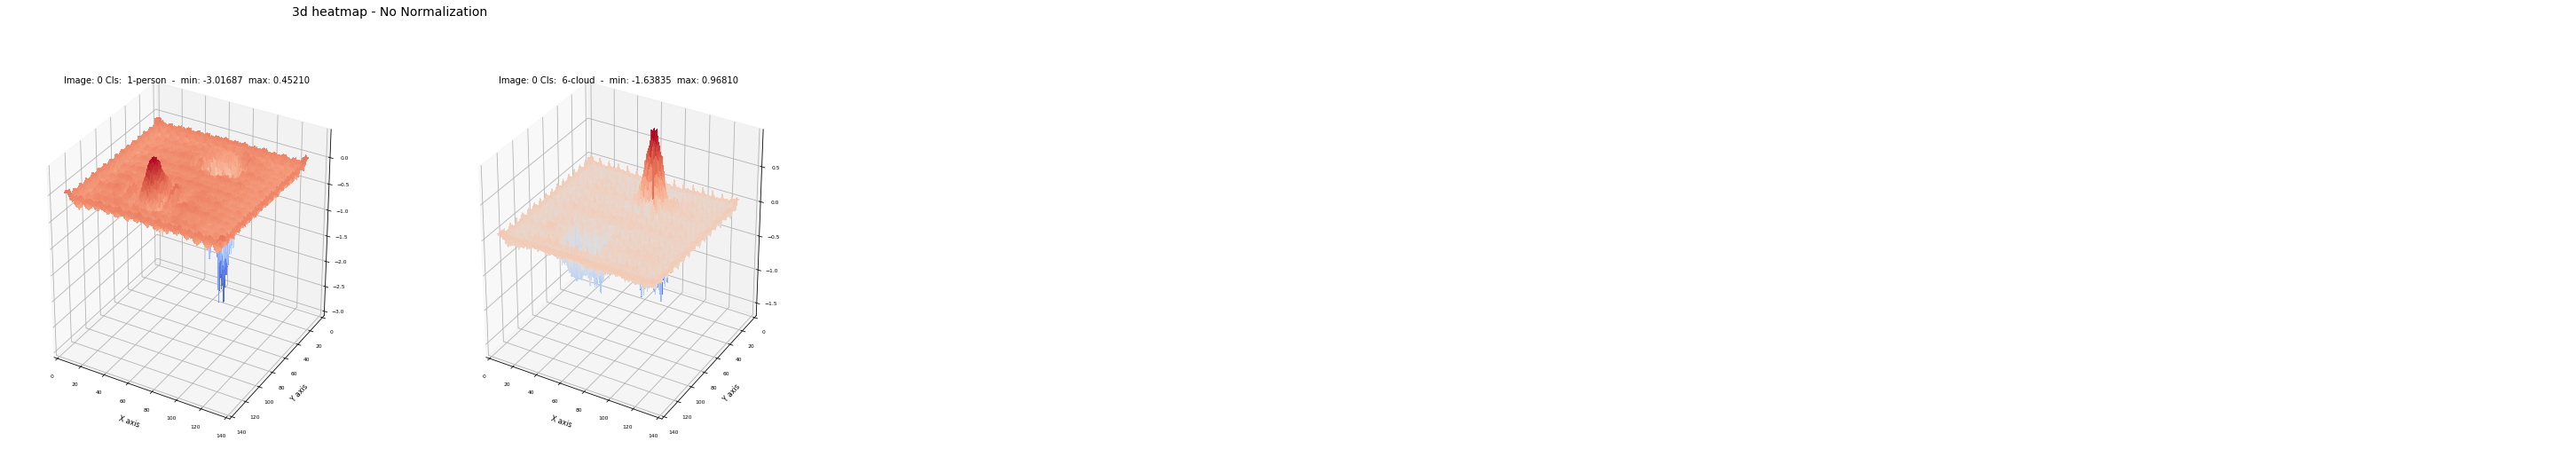

In [120]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(f['fcn_hm'].shape)
    class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    plot_3d_heatmap(f['fcn_sm'], 0, class_ids,class_names = coco_class_names, scaling = 'none')

## 2D heatmaps

###  `pr_hm`

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (128, 128, 7)  boxes:  (7, 64, 24)
 Image Id:  0  Display classes: [1 6]
 rows   1  columns : 3 boxes.shape :  (7, 64, 24)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


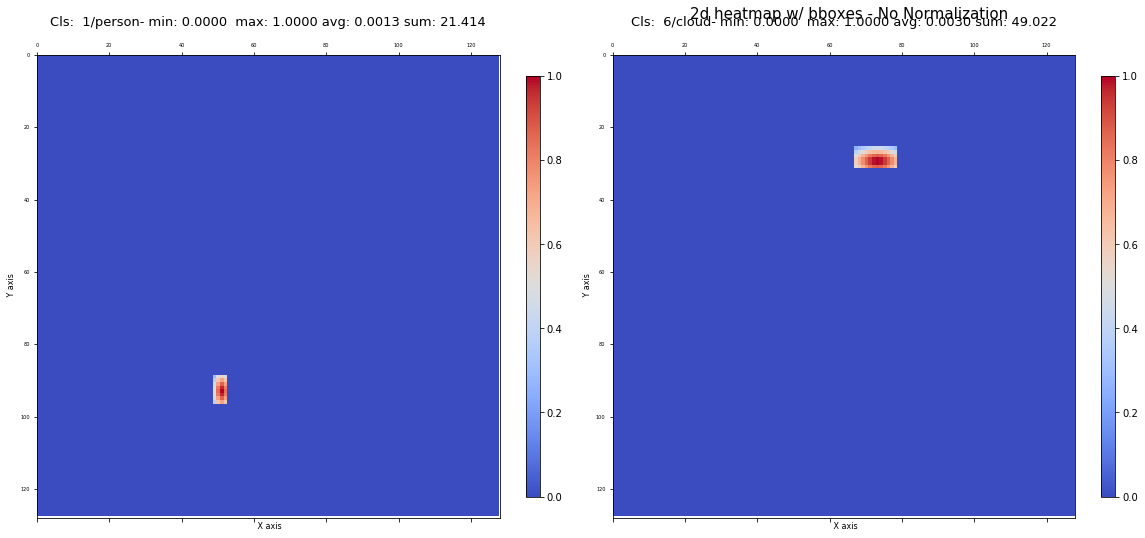

In [124]:
img_id = 0
 
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['pr_hm'], f['pr_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 1, scaling = 'none', size = (8,8))

### `fcn_hm`

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (128, 128, 7)  boxes:  (7, 64, 24)
 Image Id:  0  Display classes: [1 6]
 rows   1  columns : 3 boxes.shape :  (7, 64, 24)
 min_z_all shape: ()  min_z_all: -3.057863  max_z_all: () max_z_all: 0.9680987
 min_z_cls shape: (1, 1, 7)  max_z_cls shape: (1, 1, 7)
 SCALING == none 


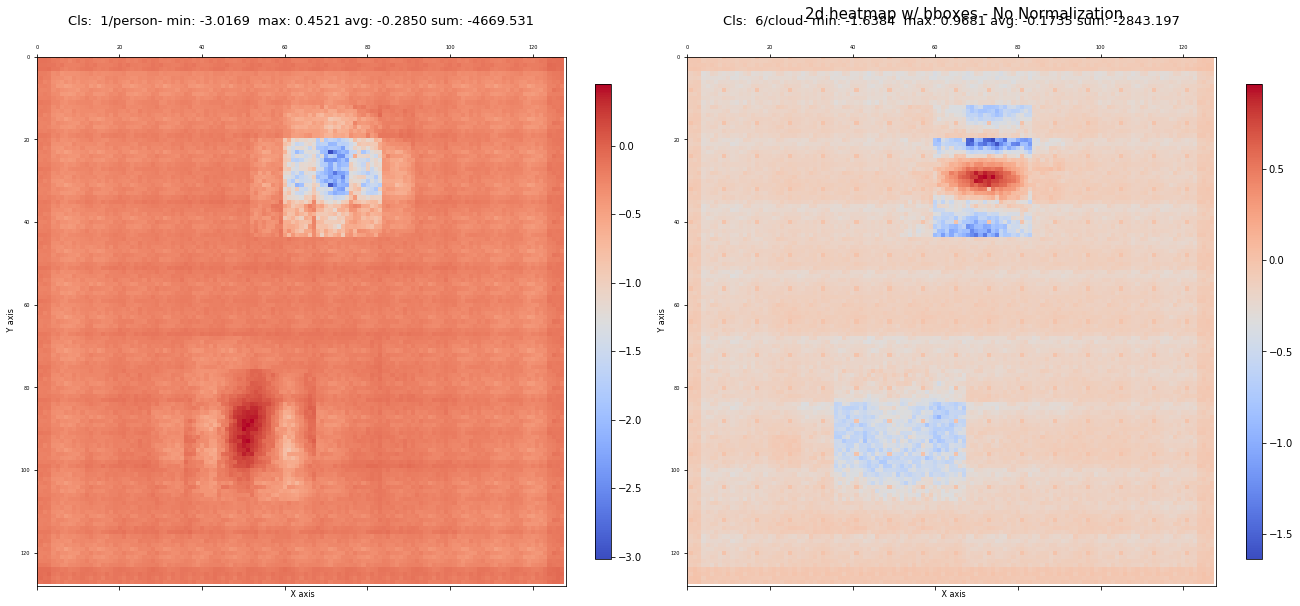

In [128]:
img_id = 0
 
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 1, scaling = 'none')

# Run Object Detection on sample images

###  Test on loaded image

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
%matplotlib inline
import random, os
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = 'E:/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [ ]:
# Run detection
# results = mrcnn_model.detect([image], verbose=1)
results = fcn_model.detect_from_images(mrcnn_model, [image], verbose=1)

In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

# Evaluation of mAP  over a number of images

In [8]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

### Load previously saved AP Results from file

In [30]:
save_path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
AP_results_file= 'test_AP_results_2019_01_19'

In [31]:
All_APResults = {}

In [32]:
path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
prev_AP_results_file= 'test_AP_results_2019_01_14'
with open(os.path.join(path, prev_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)
All_APResults = APRes

# print('/'.join(weights_file.split('/')[-3:]))
print(len(All_APResults.keys()))
for i in sorted(All_APResults):
    print(i, All_APResults[i]['Epochs'])

14
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0001.h5 0001
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0150.h5 0150
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0346.h5 0346
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0419.h5 0419
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0450.h5 0450
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0482.h5 0482
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0521.h5 0521
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0610.h5 0610
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0687.h5 0687
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0793.h5 0793
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0821.h5 0821
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0940.h5 0940
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\

In [33]:
print(AP_results_file)

test_AP_results_2019_01_19


### Load weight file

In [11]:
DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization

files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
           'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
           'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
           'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
           'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
files  = ['fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5', 
          'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5', 
          'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5', 
          'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5', 
          'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']

FILE_IDX = 3
weights_file = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
print("Loading weights ", weights_file)
fcn_model.load_model_weights(weights_file)

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 
FCN  MODEL Load weight file COMPLETE 


### Run `compute_ap` over images

In [22]:
import mrcnn.calculate_map as cmap

for FILE_IDX in [3]:
    weights_file = os.path.join(DIR_WEIGHTS  , files[FILE_IDX])
    print("Loading weights ", weights_file)
    fcn_model.load_model_weights(weights_file)

    ###  Initialize data structures 
    orig_score = 5
    norm_score = 8
    alt_scr_0  = 11
    alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
    alt_scr_2  = 20
    IMGS = 500
    # shuffled_image_ids = np.copy(dataset_test.image_ids)
    # np.random.shuffle(shuffled_image_ids)
    # image_ids = np.random.choice(dataset_test.image_ids, 300)
    image_ids = dataset_test.image_ids[:IMGS]
    print(len(image_ids))
    
    class_dict = []
    gt_dict = {}
    pr_dict = {}

    for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
        class_dict.append({'id'   : int(a),
                             'name' : b,
                             'scores': [],
                             'bboxes': [],
                             'mrcnn_score_orig' : [],
                             'mrcnn_score_norm' : [], 
                             'mrcnn_score_0' : [],
                             'mrcnn_score_1' : [],
                             'mrcnn_score_2' : [],
                             'fcn_score_0' : [],
                             'fcn_score_1' : [],
                             'fcn_score_2' : [],      
                          'mrcnn_score_1_norm': [],
                          'mrcnn_score_2_norm': [],                           
                          'fcn_score_1_norm'  : [],
                          'fcn_score_2_norm'  : []                           
                          })

    # Compute VOC-Style mAP @ IoU=0.5
    # Running on 10 images. Increase for better accuracy.
 

    MRCNN_AP_Orig = []
    MRCNN_AP_0 = [] 
    MRCNN_AP_1 = [] 
    MRCNN_AP_2 = []
    FCN_AP_0   = []
    FCN_AP_1   = []
    FCN_AP_2   = []

    for image_id in image_ids:
        # Load image and ground truth data
        print('==> Calculate AP for image_id : ', image_id)
        # Run object detection
        fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = 0)  
    
        gt_dict, pr_dict, class_dict = cmap.fix_update_map_dictionaries(fcn_results, gt_dict,pr_dict, class_dict)

        r = fcn_results[0] 

        #   Compute  AP, precisions, recalls, overlaps
        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,orig_score])
        MRCNN_AP_Orig.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_0])
        MRCNN_AP_0.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_0])
        FCN_AP_0.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_1])
        MRCNN_AP_1.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_1])
        FCN_AP_1.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_2])
        MRCNN_AP_2.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_2])
        FCN_AP_2.append(AP)

    print('complete')

    # mrcnn_model.class_pred_stats

    epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
    print('AP Calcs complete for epoch:', epochs , ' Weight file:', weights_file)

    APResult = {}
    APResult['Filename']      =  weights_file  
    APResult['Epochs']        =  epochs
    APResult['MRCNN_AP_Orig'] =  MRCNN_AP_Orig
    APResult['MRCNN_AP_0'   ] =  MRCNN_AP_0   
    APResult['MRCNN_AP_1'   ] =  MRCNN_AP_1   
    APResult['MRCNN_AP_2'   ] =  MRCNN_AP_2   
    APResult['FCN_AP_0'     ] =  FCN_AP_0     
    APResult['FCN_AP_1'     ] =  FCN_AP_1     
    APResult['FCN_AP_2'     ] =  FCN_AP_2     
    All_APResults[weights_file] = APResult


    # print('/'.join(weights_file.split('/')[-3:]))
    print(len(All_APResults.keys()))
    for i in sorted(All_APResults):
        print(i, All_APResults[i]['Epochs'])

Loading weights  /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5
    Weights file loaded: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 
FCN  MODEL Load weight file COMPLETE 
500
==> Calculate AP for image_id :  0
zero_ix: (0,)
zero_ix: (0,) N : 8
==> Calculate AP for image_id :  1
zero_ix: (0,)
zero_ix: (0,) N : 8
==> Calculate AP for image_id :  2
zero_ix: (0,)
zero_ix: (0,) N : 9
==> Calculate AP for image_id :  3
zero_ix: (0,)
zero_ix: (0,) N : 1
==> Calculate AP for image_id :  4
zero_ix: (0,)
zero_ix: (0,) N : 3
==> Calculate AP for image_id :  5
zero_ix: (0,)
zero_ix: (0,) N : 11
==> Cal

KeyboardInterrupt: 

In [ ]:
    #### Save AP_Results
    ####------------------------------------------------------------------------
    print(save_path,'  ', AP_results_file)

    with open(os.path.join(save_path, AP_results_file+'.pkl'), 'wb') as outfile:
        pickle.dump(All_APResults, outfile)
    print('Saved AP_results for epoch:',  All_APResults[i]['Epochs'], ' Weight file:', i)

In [45]:
    #### Save Cls_info, pr_bboxes dictionaries
    ####------------------------------------------------------------------------
    cls_info_file = 'test_cls_info_epoch'+epochs+'_'+str(len(image_ids))
    pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_'+str(len(image_ids))
    gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_'+str(len(image_ids))
    print('Save to :', cls_info_file,' -- ', pr_boxes_file,' -- ', gt_boxes_file)

Save to : test_cls_info_epoch2017_500  --  test_pr_bboxes_epoch2017_500  --  test_gt_bboxes_epoch2017_500


In [46]:
    with open(os.path.join(save_path, cls_info_file+'.pkl'), 'wb') as outfile:
        pickle.dump(class_dict, outfile)
    with open(os.path.join(save_path, gt_boxes_file+'.pkl'), 'wb') as outfile:
        pickle.dump(gt_dict, outfile)
    with open(os.path.join(save_path, pr_boxes_file+'.pkl'), 'wb') as outfile:
        pickle.dump(pr_dict, outfile)    
    print('Saves complete')   

Saves complete


In [41]:
# print('/'.join(weights_file.split('/')[-3:]))
print(len(All_APResults.keys()))
for i in sorted(All_APResults):
    print(i, All_APResults[i]['Epochs'])

19
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0001.h5 0001
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0150.h5 0150
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0346.h5 0346
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0419.h5 0419
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0450.h5 0450
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0482.h5 0482
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0521.h5 0521
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0610.h5 0610
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0687.h5 0687
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0793.h5 0793
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0821.h5 0821
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0940.h5 0940
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\

#### Display most recent AP_Results

In [47]:
####------------------------------------------------------------------------
np_format = {}
np_format['float'] = lambda x: "%10.4f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

# LIMIT = 10
# print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# for i in range(LIMIT):
#     print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
#         MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
# print()

epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print()
print('After {} training epochs.\nWeight file: {}'.format(epochs, weights_file))
print()
print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
print('-'*116)

for LIMIT in [10,50,100,250,500]:
    print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, epochs,
            np.mean(MRCNN_AP_Orig[:LIMIT]), 
            np.mean(MRCNN_AP_0[:LIMIT]), np.mean(FCN_AP_0[:LIMIT]), 
            np.mean(MRCNN_AP_1[:LIMIT]), np.mean(FCN_AP_1[:LIMIT]), 
            np.mean(MRCNN_AP_2[:LIMIT]), np.mean(FCN_AP_2[:LIMIT]) ))        


After 2017 training epochs.
Weight file: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_2017.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        2017          0.92212       0.91573       0.86515       0.92380       0.92421       0.92380       0.92512
50        2017          0.94700       0.94149       0.90181       0.94175       0.94377       0.94175       0.94087
100       2017          0.94154       0.93347       0.89236       0.93139       0.93574       0.93250       0.93233
250       2017          0.94399       0.93560       0.89383       0.93463       0.93483       0.93517       0.93259
500       2017          0.94707       0.93958       0.89852       0.93702       0.93863       0.93717       0.93691


### Save / Load AP Results to file

In [74]:
# AP_results_file= 'test_AP_results_2019_01_17'

#### Save AP_Results

In [20]:
# path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
# AP_results_file= 'test_AP_results_2019_01_18'
# with open(os.path.join(save_path, AP_results_file+'.pkl'), 'wb') as outfile:
#     pickle.dump(All_APResults, outfile)

#### Load AP_Results

In [42]:
try:
    del APRes 
except:
    pass

with open(os.path.join(save_path, AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

print(len(APRes.keys()))
# pp.pprint(APRes.keys())
for i in sorted(APRes):
    print(i, APRes[i]['Epochs'])

19
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0001.h5 0001
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0150.h5 0150
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0346.h5 0346
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0419.h5 0419
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0450.h5 0450
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0482.h5 0482
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0521.h5 0521
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0610.h5 0610
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0687.h5 0687
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0793.h5 0793
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0821.h5 0821
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0940.h5 0940
F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\

#### Display AP_Results

In [43]:
for key in sorted(APRes) :
    # print(' AP Result Entry :', key)
    print()
    print('After {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print()
    print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))
    print('\n')


After 0001 training epochs.
Weight file: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.92212       0.91573       0.88161       0.92380       0.87075       0.92380       0.86246
50        0001          0.94700       0.94149       0.91562       0.94175       0.90922       0.94175       0.90402
100       0001          0.94154       0.93347       0.90665       0.93139       0.90293       0.93250       0.89957
250       0001          0.94399       0.93560       0.90917       0.93463       0.90936       0.93517       0.90512
500       0001          0.94707       0.93958       0.91349       0.93702       0.91277       0.93717       0.91002



After 0150 training epochs.
Weight file: F:/models_newshapes/train_f

In [39]:
del APRes

In [33]:
# for key in sorted(APRes) :
#     # print(' AP Result Entry :', key)
#     print()
#     print('After {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
#     print()
#     print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
#     print('-'*116)
#     for LIMIT in [10,50,100,250,500]:
#         print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
#                 np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
#                 np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
#                 np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
#                 np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
#                 np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
#                 np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
#                 np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))
#     print('\n')


After 0001 training epochs.
Weight file: F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000\fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.92212       0.91573       0.88161       0.92380       0.87075       0.92380       0.86246
50        0001          0.94700       0.94149       0.91562       0.94175       0.90922       0.94175       0.90402
100       0001          0.94154       0.93347       0.90665       0.93139       0.90293       0.93250       0.89957
250       0001          0.94399       0.93560       0.90917       0.93463       0.90936       0.93517       0.90512
500       0001          0.94707       0.93958       0.91349       0.93702       0.91277       0.93717       0.91002



After 0150 training epochs.
Weight file: F:/models_newshapes/train_f

In [1]:
# print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# for i in range(len(MRCNN_AP_Orig)):
#     print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
#         MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
# print()

# print()
# print('Weight file used: {}   {}'.format(files[FILE_IDX], files[FILE_IDX].split('_')[1].rstrip('.h5')))
# print()
# print("{:<10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# print('-'*108)
# print("{:<3d}-{:<7s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(len(image_ids),files[FILE_IDX].split('_')[1].rstrip('.h5'),
#         np.mean(MRCNN_AP_Orig), np.mean(MRCNN_AP_0), np.mean(FCN_AP_0), np.mean(MRCNN_AP_1), np.mean(FCN_AP_1), np.mean(MRCNN_AP_2), np.mean(FCN_AP_2)))        

In [ ]:
# print(r['image_meta'][:9])
# print(r['gt_class_ids'])
# print(r['gt_bboxes'])
# print(r['class_ids']) 
# print(r['molded_rois'])
# pr_scores_by_image = utils.byclass_to_byimage_np(r['pr_hm_scores'], 7)
# print(pr_scores_by_image[:,:5])
# print(r['pr_scores'].shape)
# print(r['pr_scores'][:,:4])

### Save to file

In [19]:
cls_info_file = 'test_cls_info_epoch'+epochs+'_'+str(len(image_ids))
pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_'+str(len(image_ids))
gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_'+str(len(image_ids))
print(save_path)
print(cls_info_file,'   ', pr_boxes_file,'   ', gt_boxes_file)

E:\git_projs\MRCNN3\train_newshapes\training_results
test_cls_info_epoch0821_500     test_pr_bboxes_epoch0821_500     test_gt_bboxes_epoch0821_500


In [20]:
with open(os.path.join(save_path, cls_info_file+'.pkl'), 'wb') as outfile:
    pickle.dump(class_dict, outfile)
with open(os.path.join(save_path, gt_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(gt_dict, outfile)
with open(os.path.join(save_path, pr_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(pr_dict, outfile)    

# with open(os.path.join(save_path, cls_info_file+'.json'), 'w') as outfile:
#     json.dump(class_dict, outfile)
# with open(os.path.join(save_path, gt_boxes_file+'.json'), 'w') as outfile:
#     json.dump(gt_dict, outfile)
# with open(os.path.join(save_path, pr_boxes_file+'.json'), 'w') as outfile:
#     json.dump(pr_dict, outfile)    

### Load and display previously saved AP Results from file

In [5]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [10]:
# save_path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
prev_AP_results_file= 'test_AP_results_2019_01_14'

load_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes/BCE3_test_results"
AP_results_file= 'test_AP_results_2019_02_14'

In [11]:
All_APResults = {}

In [14]:
with open(os.path.join(load_path, AP_results_file+'.pkl'), 'rb') as outfile:
    All_APResults = pickle.load(outfile)

# print('/'.join(weights_file.split('/')[-3:]))
print(len(All_APResults.keys()))
for i in sorted(All_APResults):
    print(i, All_APResults[i]['Epochs'])

21
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5 0001
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0003.h5 0003
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0005.h5 0005
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 0009
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0012.h5 0012
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0020.h5 0020
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0023.h5 0023
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0027.h5 0027
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0033.h5 0033
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0047.h5 0047
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0070.h5 0070
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0080.h5 0080
/

In [13]:
print(AP_results_file)

test_AP_results_2019_02_14


#### Display AP_Results - Per Weight File

In [15]:
for key in sorted(All_APResults) :
    # print(' AP Result Entry :', key)
    print()
    print('After {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print()
    print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))
    print('\n')


After 0001 training epochs.
Weight file: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.87100       0.86736       0.86351       0.86513       0.88464       0.86513       0.88933
50        0001          0.90772       0.90190       0.89893       0.89750       0.91524       0.89750       0.91248
100       0001          0.89855       0.89165       0.89122       0.88946       0.90177       0.88730       0.90067
250       0001          0.90118       0.89748       0.89473       0.89526       0.90309       0.89442       0.90356
500       0001          0.90799       0.90404       0.89981       0.90244       0.90715       0.90198       0.90850



After 0003 training epochs.
Weight file: /home/kbardool/models_

#### Display AP_Results - Per Weight File

In [21]:
LIMIT = 250
print('Scores over ', LIMIT, ' Images after different training epochs.')
print()
print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
print('-'*116)

for key in sorted(All_APResults) :
    # print(' AP Result Entry :', key)
    print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
            np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
            np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
            np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
            np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
            np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
            np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
            np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))


Scores over  250  Images after different training epochs.

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
250       0001          0.90118       0.89748       0.89473       0.89526       0.90309       0.89442       0.90356
250       0003          0.90118       0.89748       0.89701       0.89526       0.89535       0.89442       0.87522
250       0005          0.90118       0.89748       0.88863       0.89526       0.88806       0.89442       0.87587
250       0009          0.90118       0.89748       0.89022       0.89526       0.89208       0.89442       0.88372
250       0012          0.90118       0.89748       0.89412       0.89526       0.88781       0.89442       0.88623
250       0020          0.90118       0.89748       0.88313       0.89526       0.87669       0.89442       0.88060
250       00

# Update Map Dictionaries

In [9]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = { 'float'  : lambda x: "{:>10.4f}".format(x) , 
              'int'    : lambda x: "%>10d" % x
            }
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [10]:
# class_dict = []
# gt_dict = {}
# pr_dict = {}

# for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
#     class_dict.append({'id'   : int(a),
#                          'name' : b,
#                          'scores': [],
#                          'bboxes': [],
#                          'mrcnn_score_orig' : [],
#                          'mrcnn_score_norm' : [], 
#                          'mrcnn_score_0' : [],
#                          'mrcnn_score_1' : [],
#                          'mrcnn_score_2' : [],
#                          'fcn_score_0' : [],
#                          'fcn_score_1' : [],
#                          'fcn_score_2' : [],                      
#                       })

fix_class_dict = []
fix_gt_dict = {}
fix_pr_dict = {}

for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
    fix_class_dict.append({'id'              : int(a),
                          'name'              : b,
                          'scores'            : [],
                          'bboxes'            : [],
                          'mrcnn_score_orig'  : [],
                          'mrcnn_score_norm'  : [], 
                          'mrcnn_score_0'     : [],
                          'mrcnn_score_1'     : [],
                          'mrcnn_score_2'     : [],
                          'fcn_score_0'       : [],
                          'fcn_score_1'       : [],
                          'fcn_score_2'       : [],  
                          'mrcnn_score_1_norm': [],
                          'mrcnn_score_2_norm': [],                           
                          'fcn_score_1_norm'  : [],
                          'fcn_score_2_norm'  : [],  
                           
                      })


In [19]:
fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, 357, verbose = 1)  

Image Id  : 357     External Id: shapes.357     Image Reference: 
[ ('sun', (138, 235, 31), (91, 7, 4, 4)),
  ('building', (248, 142, 65), (51, 50, 11, 13)),
  ('building', (57, 117, 97), (74, 70, 16, 23)),
  ('tree', (210, 29, 209), (41, 70, 14, 14)),
  ('tree', (155, 184, 113), (42, 101, 22, 22))]
===>   fcn.detect_from_images() 
===>  mrcnn_model.detect()
Processing 1 images
image                    shape: (128, 128, 3)         min:   29.00000  max:  248.00000
molded_images            shape: (1, 128, 128, 3)      min:  -87.80000  max:  124.30000
image_metas              shape: (1, 15)               min:    0.00000  max:  128.00000
===>  call mrcnn_model.predict()
===> return from  mrcnn_model.predict()
     detections        :  (1, 64, 7)
     rpn_roi_proposals :  (1, 1000, 4)
     mrcnn_class       :  (1, 1000, 7)
     mrcnn_bbox        :  (1, 1000, 7, 4)
     pr_hm             :  (1, 128, 128, 7)
     pr_hm_scores      :  (1, 7, 64, 24)

   ===> unmold_detections()
        zero_ix

####  old `update_map_dictionaries()`

In [233]:
gt_dict, pr_dict, class_dict = current_update_map_dictionaries(fcn_results, gt_dict,pr_dict, class_dict)
print()
pp.pprint(pr_dict)
pp.pprint(gt_dict)
print('class_dict')
print('----------')
pp.pprint(class_dict)
# for i in class_dict[3].keys():
#     print(i, type(class_dict[3][i]))
# for i in pr_dict.keys():
#     print(' key: {} , type{} '.format(i, type(pr_dict[i])) )
#     for j in pr_dict[i].keys():
#         print('      key: {} , type{} '.format(j, type(pr_dict[i][j])) )

# for i in gt_dict.keys():
#     print(' key: {} , type{} '.format(i, type(gt_dict[i])) )
#     for j in gt_dict[i].keys():
#         print('      key: {} , type{} '.format(j, type(gt_dict[i][j])) )
        


Class:  4 Score:  1.0 BBox:  [51.0, 58.0, 96.0, 91.0]
fcn_score :  [2.0, 87.0, 12.0, 96.0, 3.0, 0.9994, 1.0, 61.0, 1.0, 0.346, 90.0, 0.346, 0.0968, 25.0, 0.0039, 1.0, 1.0, 1.0, 8.5843, 25.0, 0.3434, 1.0, 1.0, 1.0]
pr_score  :  [2.0, 87.0, 12.0, 96.0, 3.0, 0.9994, 1.0, 61.0, 1.0, 0.9361, 90.0, 0.9361, 15.9928, 25.0, 0.6397, 1.0, 1.0, 1.0, 15.9928, 25.0, 0.6397, 1.0, 1.0, 1.0]

Class:  4 Score:  1.0 BBox:  [35.0, 40.0, 65.0, 62.0]
fcn_score :  [51.0, 58.0, 96.0, 91.0, 4.0, 1.0, 1.0, 64.0, 1.0, 6.3036, 1485.0, 6.3036, 0.7327, 90.0, 0.0081, 1.0, 1.0, 1.0, 50.7324, 90.0, 0.5637, 1.0, 1.0, 1.0]
pr_score  :  [51.0, 58.0, 96.0, 91.0, 4.0, 1.0, 1.0, 64.0, 1.0, 0.9999, 1485.0, 0.9999, 62.5043, 90.0, 0.6945, 1.0, 1.0, 1.0, 62.5043, 90.0, 0.6945, 1.0, 1.0, 1.0]

Class:  5 Score:  0.9997 BBox:  [62.0, 27.0, 85.0, 52.0]
fcn_score :  [35.0, 40.0, 65.0, 62.0, 4.0, 1.0, 1.0, 63.0, 1.0, 3.743, 660.0, 3.7429, 0.4404, 56.0, 0.0079, 0.6011, 0.6222, 0.966, 30.4947, 56.0, 0.5445, 0.6011, 0.6222, 0.966]
pr_s

####  new `update_map_dictionaries()`

In [21]:
fix_gt_dict, fix_pr_dict, fix_class_dict = fix_update_map_dictionaries(fcn_results, fix_gt_dict, fix_pr_dict, fix_class_dict)
print()
pp.pprint(fix_pr_dict)
pp.pprint(fix_gt_dict)
print()
print('class_dict')
print('----------')
pp.pprint(fix_class_dict)


PR Class:  3 Score:  0.9994 BBox:  [2.0, 87.0, 12.0, 96.0] [2.0, 87.0, 12.0, 96.0]

pr_score  :  [3.0000     0.9994     1.0000     61.0000    1.0000     0.9361     90.0000    0.9361     15.9928    25.0000    0.6397     1.0000     15.9928    25.0000    0.6397     1.0000    ]
fcn_score :  [3.0000     0.9994     1.0000     61.0000    1.0000     20.8620    90.0000    20.8620    11.3371    25.0000    0.4535     1.0000     15.6532    25.0000    0.6261     1.0000    ]

PR Class:  4 Score:  1.0 BBox:  [51.0, 58.0, 96.0, 91.0] [51.0, 58.0, 96.0, 91.0]

pr_score  :  [4.0000     1.0000     1.0000     64.0000    1.0000     0.9999     1485.0000  0.9999     62.5043    90.0000    0.6945     1.0000     62.5043    90.0000    0.6945     1.0000    ]
fcn_score :  [4.0000     1.0000     1.0000     64.0000    1.0000     -0.9473    1485.0000  -0.9473    36.3053    90.0000    0.4034     0.8991     58.5228    90.0000    0.6503     0.8991    ]

PR Class:  4 Score:  1.0 BBox:  [35.0, 40.0, 65.0, 62.0] [35.0, 40

In [17]:
##------------------------------------------------------------------------------------------
##  Update mAP Dictionaries
##------------------------------------------------------------------------------------------    
def current_update_map_dictionaries(results, gt_dict, pr_dict, class_dict):
    orig_score = 5
    norm_score = 8
    alt_scr_0  = 11
    alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
    alt_scr_2  = 20    
    r = results[0]
    assert r['class_ids'].shape[0] == r['pr_scores'].shape[0] == r['fcn_scores'].shape[0], " {} {} {} {} ".format(
           r['class_ids'].shape, r['pr_scores'].shape,  r['fcn_scores'].shape, r['image_meta'])
    
    ## build keyname
    keyname = 'newshapes_{:05d}'.format(r['image_meta'][0])
    
    ## 
    zero_ix = np.where(r['gt_bboxes'][:, 3] == 0)[0]
    if zero_ix.shape[0] > 0 :
        print(' There are non zero items in the gt_class_id nparray  :', N)
        for i in zero_ix:
            print(r['gt_bboxes'][i] , r['gt_class_ids'][i])
        N = zero_ix[0] 
    else:
        N = r['gt_bboxes'].shape[0]

    gt_dict[keyname] = {"boxes"     : r['gt_bboxes'][:N,:].tolist(),
                        "class_ids" : r['gt_class_ids'][:N].tolist()}
      
    pr_dict[keyname] =  {"scores"          : [], 
                         "boxes"           : [], 
                         "class_ids"       : [], 
                         "det_ind"         : [],
                         "mrcnn_score_orig": [],    
                         "mrcnn_score_norm": [],
                         "mrcnn_score_0"   : [],
                         "mrcnn_score_1"   : [],
                         "mrcnn_score_2"   : [],
                         "fcn_score_0"     : [],
                         "fcn_score_1"     : [],
                         "fcn_score_2"     : [] }
    
    for cls, score, bbox, pr_score, fcn_score, det_ind in zip(r['class_ids'].tolist(), 
                                                              r['scores'].tolist(), 
                                                              r['molded_rois'].tolist(), 
                                                              np.round(r['pr_scores'],4).tolist(), 
                                                              np.round(r['fcn_scores'],4).tolist(), 
                                                              r['detection_ind'].tolist()):
        pr_dict[keyname]['class_ids'].append(cls)
        pr_dict[keyname]['scores'].append(np.round(score,4))
        pr_dict[keyname]['boxes'].append(bbox)
        pr_dict[keyname]['det_ind'].append(np.rint(det_ind))
                         
        pr_dict[keyname]["mrcnn_score_orig"].append(pr_score[orig_score])
        pr_dict[keyname]["mrcnn_score_norm"].append(pr_score[norm_score])
        
        pr_dict[keyname]["mrcnn_score_0"   ].append(pr_score[alt_scr_0])
        pr_dict[keyname]["mrcnn_score_1"   ].append(pr_score[alt_scr_1])
        pr_dict[keyname]["mrcnn_score_2"   ].append(pr_score[alt_scr_2])
        
        pr_dict[keyname]["fcn_score_0"     ].append(fcn_score[alt_scr_0])
        pr_dict[keyname]["fcn_score_1"     ].append(fcn_score[alt_scr_1])
        pr_dict[keyname]["fcn_score_2"     ].append(fcn_score[alt_scr_2])

#         print('class_dict[cls]: ', cls, class_dict[cls]['scores'])
        class_dict[cls]['scores'].append(np.round(score,4))
        class_dict[cls]['bboxes'].append(bbox)
        class_dict[cls]["mrcnn_score_orig"].append(pr_score[orig_score])
        class_dict[cls]["mrcnn_score_norm"].append(pr_score[norm_score])
        class_dict[cls]["mrcnn_score_0"   ].append(pr_score[alt_scr_0])
        class_dict[cls]["mrcnn_score_1"   ].append(pr_score[alt_scr_1])
        class_dict[cls]["mrcnn_score_2"   ].append(pr_score[alt_scr_2])
        
        class_dict[cls]["fcn_score_0"     ].append(fcn_score[alt_scr_0])
        class_dict[cls]["fcn_score_1"     ].append(fcn_score[alt_scr_1])
        class_dict[cls]["fcn_score_2"     ].append(fcn_score[alt_scr_2])
        print()
        print('Class: ', cls, 'Score: ', np.round(score,4), 'BBox: ', bbox )
        print('fcn_score : ', fcn_score )
        print('pr_score  : ', pr_score  )
    return gt_dict, pr_dict, class_dict    
    

    
##------------------------------------------------------------------------------------------
##  Update mAP Dictionaries
##------------------------------------------------------------------------------------------    
def fix_update_map_dictionaries(results, gt_dict, pr_dict, class_dict):
    CLASS_COLUMN        = 4
    ORIG_SCORE_COLUMN   = 5
    DT_TYPE_COLUMN      = 6
    SEQUENCE_COLUMN     = 7
    NORM_SCORE_COLUMN   = 8    
    BBOX_AREA_COLUMN    = 10
    SCORE_0_COLUMN      = 11
    CLIP_AREA_COLUMN    = 13
    SCORE_1_COLUMN      = 14 
    SCORE_1_NORM_COLUMN = 17
    SCORE_2_COLUMN      = 20
    SCORE_2_NORM_COLUMN = 23
    r = results[0]
    assert r['class_ids'].shape[0] == r['pr_scores'].shape[0] == r['fcn_scores'].shape[0], " {} {} {} {} ".format(
           r['class_ids'].shape, r['pr_scores'].shape,  r['fcn_scores'].shape, r['image_meta'])
    
    ## build keyname
    keyname = 'newshapes_{:05d}'.format(r['image_meta'][0])
    
    ## 
    zero_ix = np.where(r['gt_bboxes'][:, 3] == 0)[0]
    if zero_ix.shape[0] > 0 :
        print('-----------------------------------------------------------')
        print(' There are non zero items in the gt_class_id nparray  :', N)
        for i in zero_ix:
            print(r['gt_bboxes'][i] , r['gt_class_ids'][i])
        print('-----------------------------------------------------------')
            
        N = zero_ix[0] 
    else:
        N = r['gt_bboxes'].shape[0]

    gt_dict[keyname] = {"boxes"     : r['gt_bboxes'][:N,:].tolist(),
                        "class_ids" : r['gt_class_ids'][:N].tolist()}
      
    pr_dict[keyname] =  {"scores"            : [], 
                         "boxes"             : [], 
                         "class_ids"         : [], 
                         "det_ind"           : [],
                         "mrcnn_score_orig"  : [],    
                         "mrcnn_score_norm"  : [],
                         "mrcnn_score_0"     : [],
                         "mrcnn_score_1"     : [],
                         "mrcnn_score_2"     : [],
                         "mrcnn_score_1_norm": [],
                         "mrcnn_score_2_norm": [],                         
                         "fcn_score_0"       : [],
                         "fcn_score_1"       : [],
                         "fcn_score_2"       : [],
                         "fcn_score_1_norm"  : [],
                         "fcn_score_2_norm"  : [] }
    
 
        
    for  pr_score, fcn_score in zip(np.round(r['pr_scores'],4), np.round(r['fcn_scores'],4) ):
        assert np.all(pr_score[:NORM_SCORE_COLUMN] == fcn_score[:NORM_SCORE_COLUMN]), 'FCN_SCORE[:8] <> PR_SCORE[:8]'
        pr_cls   = int(pr_score[CLASS_COLUMN])
        pr_bbox  = pr_score[:4].tolist()
        pr_scr   = pr_score[ORIG_SCORE_COLUMN]
        pr_dict[keyname]['class_ids'].append(pr_cls)
        pr_dict[keyname]['det_ind'].append(np.rint(pr_score[DT_TYPE_COLUMN]))
        
        pr_dict[keyname]['boxes'].append(pr_bbox)
        pr_dict[keyname]['scores'].append(pr_score[ORIG_SCORE_COLUMN])
                         
        pr_dict[keyname]["mrcnn_score_orig"].append(pr_score[ORIG_SCORE_COLUMN])
        pr_dict[keyname]["mrcnn_score_norm"].append(pr_score[NORM_SCORE_COLUMN])
        
        pr_dict[keyname]["mrcnn_score_0"   ].append(pr_score[SCORE_0_COLUMN])
        
        pr_dict[keyname]["mrcnn_score_1"     ].append(pr_score[SCORE_1_COLUMN])
        pr_dict[keyname]["mrcnn_score_1_norm"].append(pr_score[SCORE_1_NORM_COLUMN])
        pr_dict[keyname]["mrcnn_score_2"     ].append(pr_score[SCORE_2_COLUMN])
        pr_dict[keyname]["mrcnn_score_2_norm"].append(pr_score[SCORE_2_NORM_COLUMN])
        
        pr_dict[keyname]["fcn_score_0"     ].append(fcn_score[SCORE_0_COLUMN])
        pr_dict[keyname]["fcn_score_1"     ].append(fcn_score[SCORE_1_COLUMN])
        pr_dict[keyname]["fcn_score_1_norm"].append(fcn_score[SCORE_1_NORM_COLUMN])
        pr_dict[keyname]["fcn_score_2"     ].append(fcn_score[SCORE_2_COLUMN])
        pr_dict[keyname]["fcn_score_2_norm"].append(fcn_score[SCORE_2_NORM_COLUMN])

 
        
        class_dict[pr_cls]['scores'].append(pr_score[ORIG_SCORE_COLUMN])
        class_dict[pr_cls]['bboxes'].append(pr_bbox)
        
        class_dict[pr_cls]["mrcnn_score_orig"].append(pr_score[ORIG_SCORE_COLUMN])
        class_dict[pr_cls]["mrcnn_score_norm"].append(pr_score[NORM_SCORE_COLUMN])
        
        class_dict[pr_cls]["mrcnn_score_0"     ].append(pr_score[SCORE_0_COLUMN])
        class_dict[pr_cls]["mrcnn_score_1"     ].append(pr_score[SCORE_1_COLUMN])
        class_dict[pr_cls]["mrcnn_score_2"     ].append(pr_score[SCORE_2_COLUMN])
        class_dict[pr_cls]["mrcnn_score_1_norm"].append(pr_score[SCORE_1_NORM_COLUMN])
        class_dict[pr_cls]["mrcnn_score_2_norm"].append(pr_score[SCORE_2_NORM_COLUMN])
                
        class_dict[pr_cls]["fcn_score_0"     ].append(fcn_score[SCORE_0_COLUMN])
        class_dict[pr_cls]["fcn_score_1"     ].append(fcn_score[SCORE_1_COLUMN])
        class_dict[pr_cls]["fcn_score_2"     ].append(fcn_score[SCORE_2_COLUMN])
        class_dict[pr_cls]["fcn_score_1_norm"].append(fcn_score[SCORE_1_NORM_COLUMN])
        class_dict[pr_cls]["fcn_score_2_norm"].append(fcn_score[SCORE_2_NORM_COLUMN])
        
        np_format = { 'float'  : lambda x: "{:<10.4f}".format(x) , 
                      'int'    : lambda x: "{:>10d}".format(x) }
        np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)        
        print()
#         print('   Class: ', cls   , 'Score: ', np.round(score,4), 'BBox: ', bbox )
        print('PR Class: ', pr_cls, 'Score: ', pr_scr           , 'BBox: ', pr_bbox, pr_score[:4].tolist() )
        print()
        print('pr_score  : ', pr_score[[4,5,6,7,8,9,10,11,12,13,14,17,18,19,20,23]] )
        print('fcn_score : ', fcn_score[[4,5,6,7,8,9,10,11,12,13,14,17,18,19,20,23]] )

    return gt_dict, pr_dict, class_dict    
    

    

In [151]:
r = fcn_results[0]
print(np.round(r['pr_scores'],4).shape)
print(np.round(r['fcn_scores'],4).shape)
print(r['class_ids'].shape)
print(r['scores'].shape)
print(r['molded_rois'].shape)
# print(r['molded_rois'])
print(r['detection_ind'].shape)

for  pr_score, fcn_score, cls, score, bbox, det_ind in zip(np.round(r['pr_scores'],4), 
                                                           np.round(r['fcn_scores'],4),         
                                                           r['class_ids'], 
                                                           r['scores'], 
                                                           r['molded_rois'], 
                                                           r['detection_ind']):
        
        pr_cls   = int(pr_score[4])
        pr_bbox  = pr_score[:4].astype(np.int)
        print()
        print('   Class: ', cls   , 'Score: ', round(score,4),  'BBox: ', bbox )
        print('PR Class: ', pr_cls, 'Score: ', pr_score[5]         , 'BBox: ', pr_score[:4] )

        print('fcn_score : ', fcn_score )
        print('pr_score  : ', pr_score  )
        
        
        

(5, 24)
(5, 24)
(5,)
(5,)
(5, 4)
[[ 51.0000  58.0000  96.0000  91.0000]
 [ 35.0000  40.0000  65.0000  62.0000]
 [ 62.0000  27.0000  85.0000  52.0000]
 [  2.0000  87.0000  12.0000  96.0000]
 [ 88.0000  26.0000 123.0000  59.0000]]
(5,)

   Class:  4 Score:  1.0 BBox:  [51.0000 58.0000 96.0000 91.0000]
PR Class:  3 Score:  0.9994 BBox:  [ 2.0000 87.0000 12.0000 96.0000]
fcn_score :  [ 2.0000 87.0000 12.0000 96.0000  3.0000  0.9994  1.0000 61.0000  1.0000  0.3460 90.0000  0.3460  0.0968 25.0000  0.0039  1.0000  1.0000  1.0000  8.5843 25.0000  0.3434  1.0000
  1.0000  1.0000]
pr_score  :  [ 2.0000 87.0000 12.0000 96.0000  3.0000  0.9994  1.0000 61.0000  1.0000  0.9361 90.0000  0.9361 15.9928 25.0000  0.6397  1.0000  1.0000  1.0000 15.9928 25.0000  0.6397  1.0000
  1.0000  1.0000]

   Class:  4 Score:  1.0 BBox:  [35.0000 40.0000 65.0000 62.0000]
PR Class:  4 Score:  1.0 BBox:  [51.0000 58.0000 96.0000 91.0000]
fcn_score :  [  51.0000   58.0000   96.0000   91.0000    4.0000    1.0000    1.00